# Captsone Project: Heart Disease Prediction 

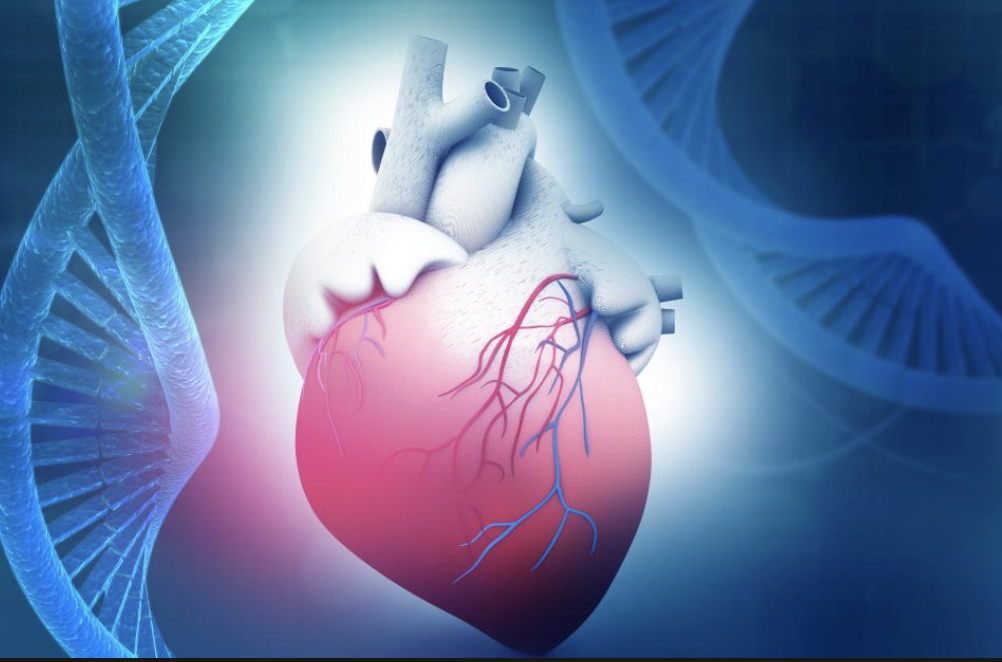

## I. Overview 

### Precision AI and medicine is a heavily growing area of interest as AI infiltrates medical applications and disease prediction tools. Cardiovascular diseases are one of the most common diseases in the world and a frequently researched topic in precision medicine. 

### This Capstone Project seeks to perform early detection of heart disease and to quantify heart disease risk through the use of machine learning and artificial intelligence applications. The following data analysis incorporates the following classification and deep learning models: Logistic Regression, Random Forest,  Support Vector Machine, K-Nearest Neighbors, Gradient Boost, XGBoost, AdaBoost, Decision Tree, Naive Bayes,  and MLP Neural Networks. The dataset used for this data analysis was found from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/45/heart+disease). 


### Research Question
### How do classification models compare with deep learning models to best predict heart disease diagnosis? 

## II. Data Inititation, Cleaning, and Exploratory Data Visualizations

### Reading in the Data

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import time 
import warnings
warnings.filterwarnings('ignore')

In [350]:
heart_data = pd.read_csv("heart_disease_uci.csv")

In [351]:
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [352]:
heart_data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [353]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Data Cleaning 

In [354]:
df= heart_data.dropna()
df.isnull().sum()
df.head(25)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [355]:
foundational_data = pd.DataFrame({
    
    'Features': df.columns,
     'Unique Values': df.nunique(),
    'Data Types': df.dtypes,
    
})
foundational_data

,Features,Unique Values,Data Types
id,id,299,int64
age,age,41,int64
sex,sex,2,object
dataset,dataset,3,object
cp,cp,4,object
trestbps,trestbps,50,float64
chol,chol,153,float64
fbs,fbs,2,object
restecg,restecg,3,object
thalch,thalch,92,float64



###  Understanding the Features


This database contains 76 attributes, but all published experiments refer to using a subset of 16 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date. The target variable 'num' is valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  


```
Input variables:
# patient health data:
16 attributes used:
      1. id - dummy id of patient data (numeric)
      2. dataset - dataset of location study(Cleveland only) (categorical)
      3. age - age in years(numeric)      
      4. sex - sex(1 = male; 0 = female)(categorical)   
      5. cp - chest pain type (categorical)
           Value 1: typical angina
           Value 2: atypical angina
           Value 3: non-anginal pain
           Value 4: asymptomatic    
      6. trestbps - resting blood pressure (in mm Hg on admission to the hospital) (numeric)  
      7. chol - serum cholestoral in mg/dl (numeric)     
      8. fbs - fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) (categorical)      
      9. restecg - resting electrocardiographic results (categorical)
         Value 0: normal
         Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
         Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria   
      10. thalach - maximum heart rate achieved (numeric)
      11. exang -  exercise induced angina (1 = yes; 0 = no) (categorical)   
      12.oldpeak - ST depression induced by exercise relative to rest (numeric)   
      13.slope - the slope of the peak exercise ST segment (categorical)
         Value 1: upsloping
         Value 2: flat
         Value 3: downsloping    
      14.ca - number of major vessels (0-3) colored by flourosopy (numeric)        
      15.thal - 3 = normal; 6 = fixed defect; 7 = reversable defect (categorical)  
      
      16.num(the predicted attribute/target) -  diagnosis of heart disease (angiographic disease status)
           Value 0 = no heart disease
           Value 1 = mild heart disease 
           Value 2 = moderate heart disease
           Value 3 = severe heart disease
           Value 4 = critical heart disease

```



### Exploratory Data Visualizations 

#### Correlation Matrix

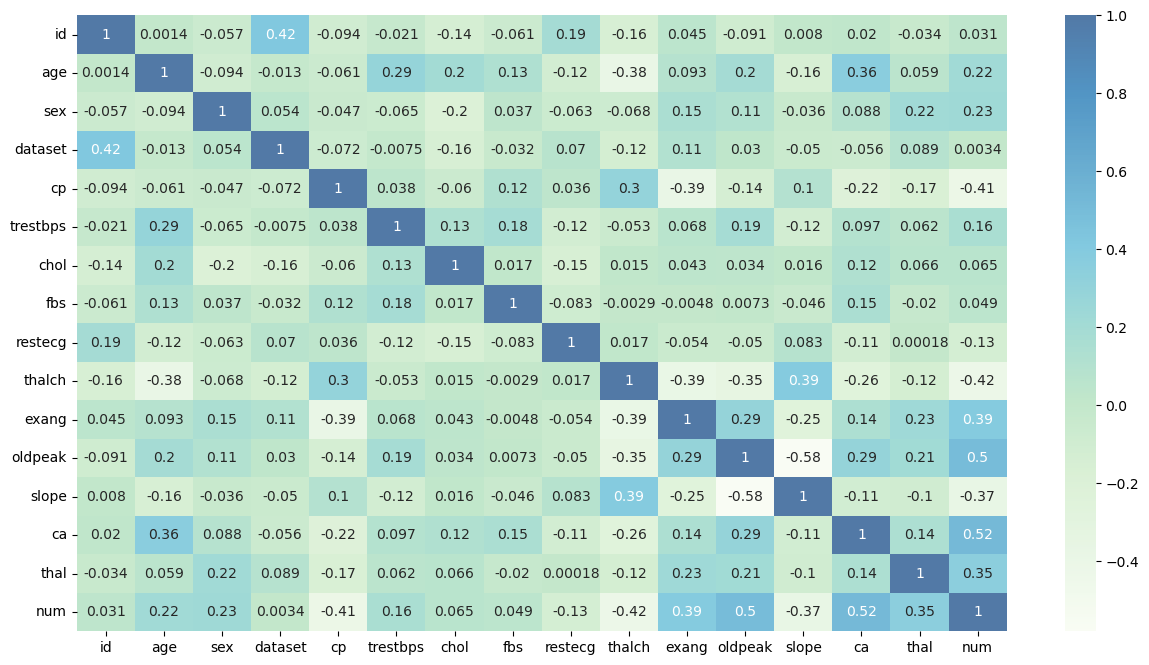

In [417]:
df2 = df.copy()
sns.set_palette("GnBu")
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])


correlation_matrix = df2.corr()
sort_corr_features = correlation_matrix.index 
#plot correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='GnBu', alpha=0.7, square=False)
plt.show()

#### The correlation matrix demonstrates a high correlation between the target 'num' variable between 'exang','oldpeak', and 'ca'. 

#### Numerical and Categorical Features Visualization 

In [357]:
numerical_features = []
object_features = []
target_feature = "num"

for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        if col!= 'num': 
            numerical_features.append(col)
            
            
for col in df.columns: 
        if df[col].dtype == "object":
                object_features.append(col)

                

print(f"Numerical Features - Float or Integer:{numerical_features}")
print("--------"*10)
print(f"Categorical Features - Object:{object_features}")
print("--------"*10)
print(f"Target Feature:{target_feature}")
print("--------"*10)

                


Numerical Features - Float or Integer:['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
--------------------------------------------------------------------------------
Categorical Features - Object:['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
--------------------------------------------------------------------------------
Target Feature:num
--------------------------------------------------------------------------------


#### Numerical Features Visualizations

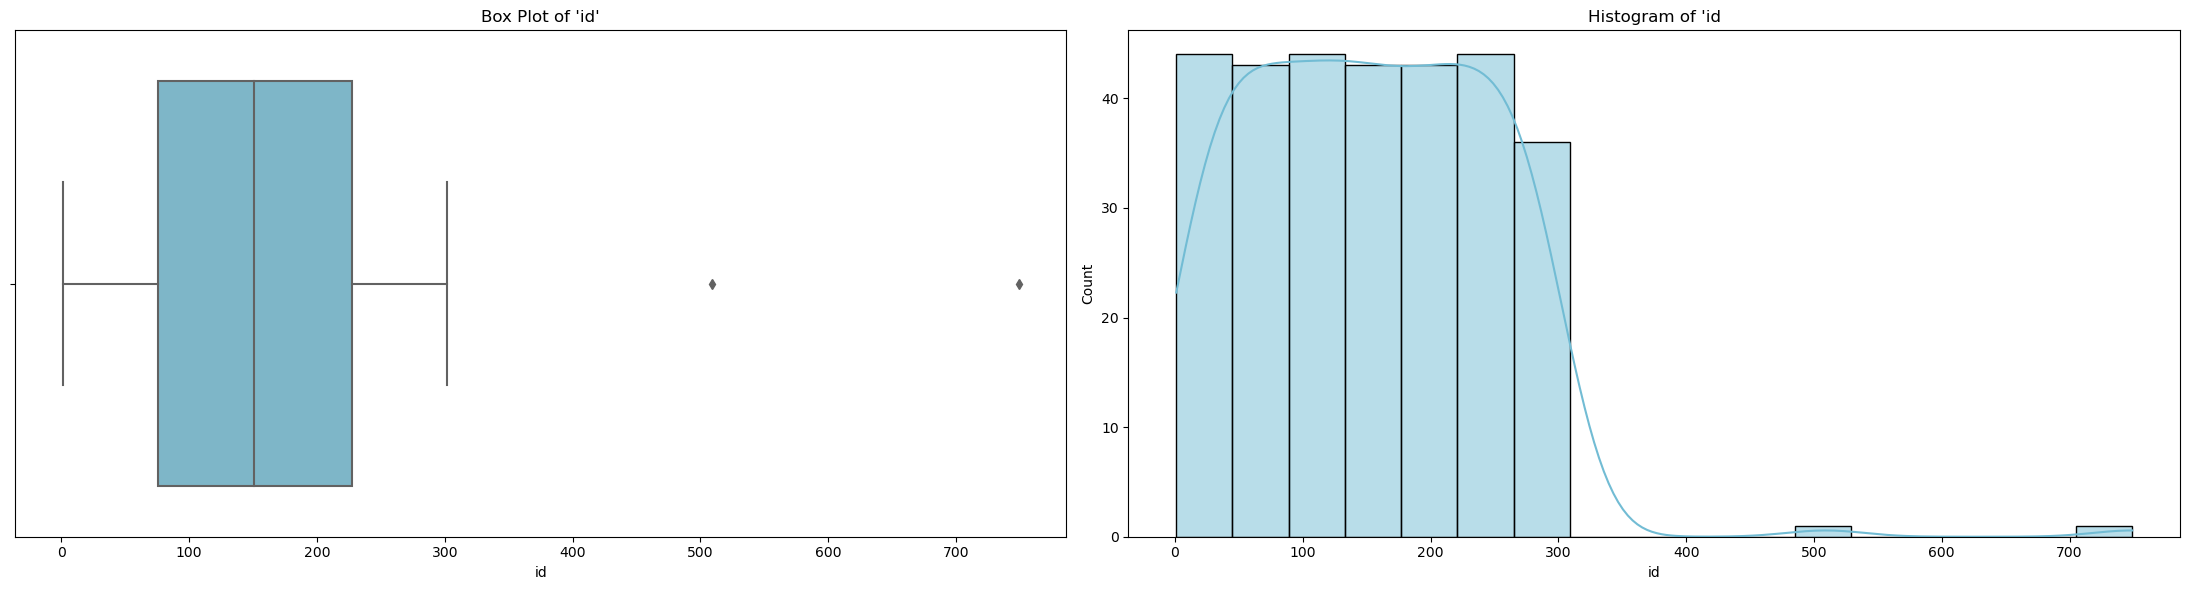

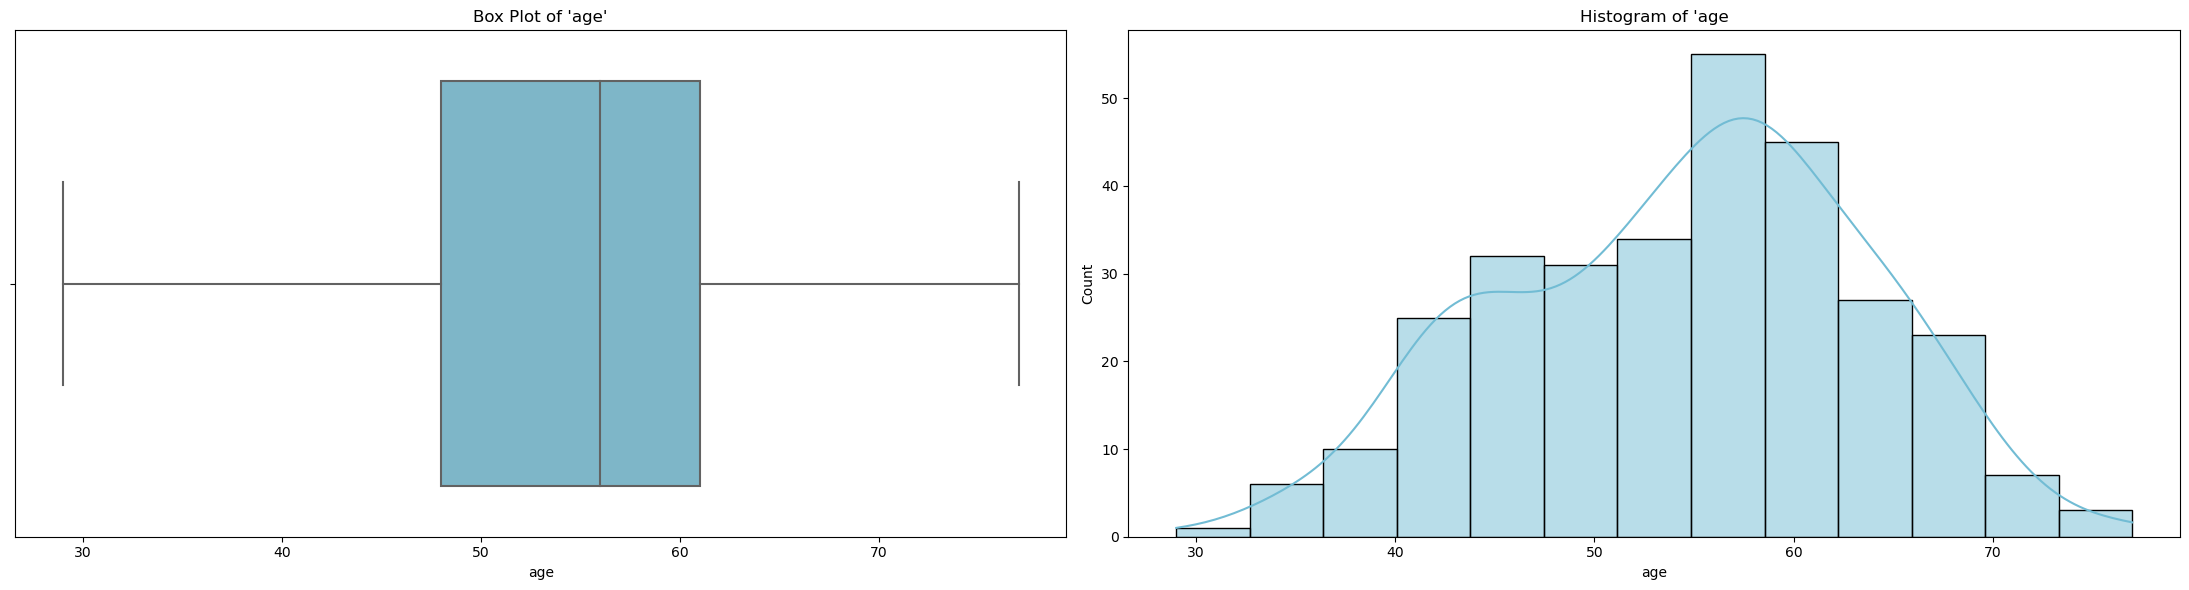

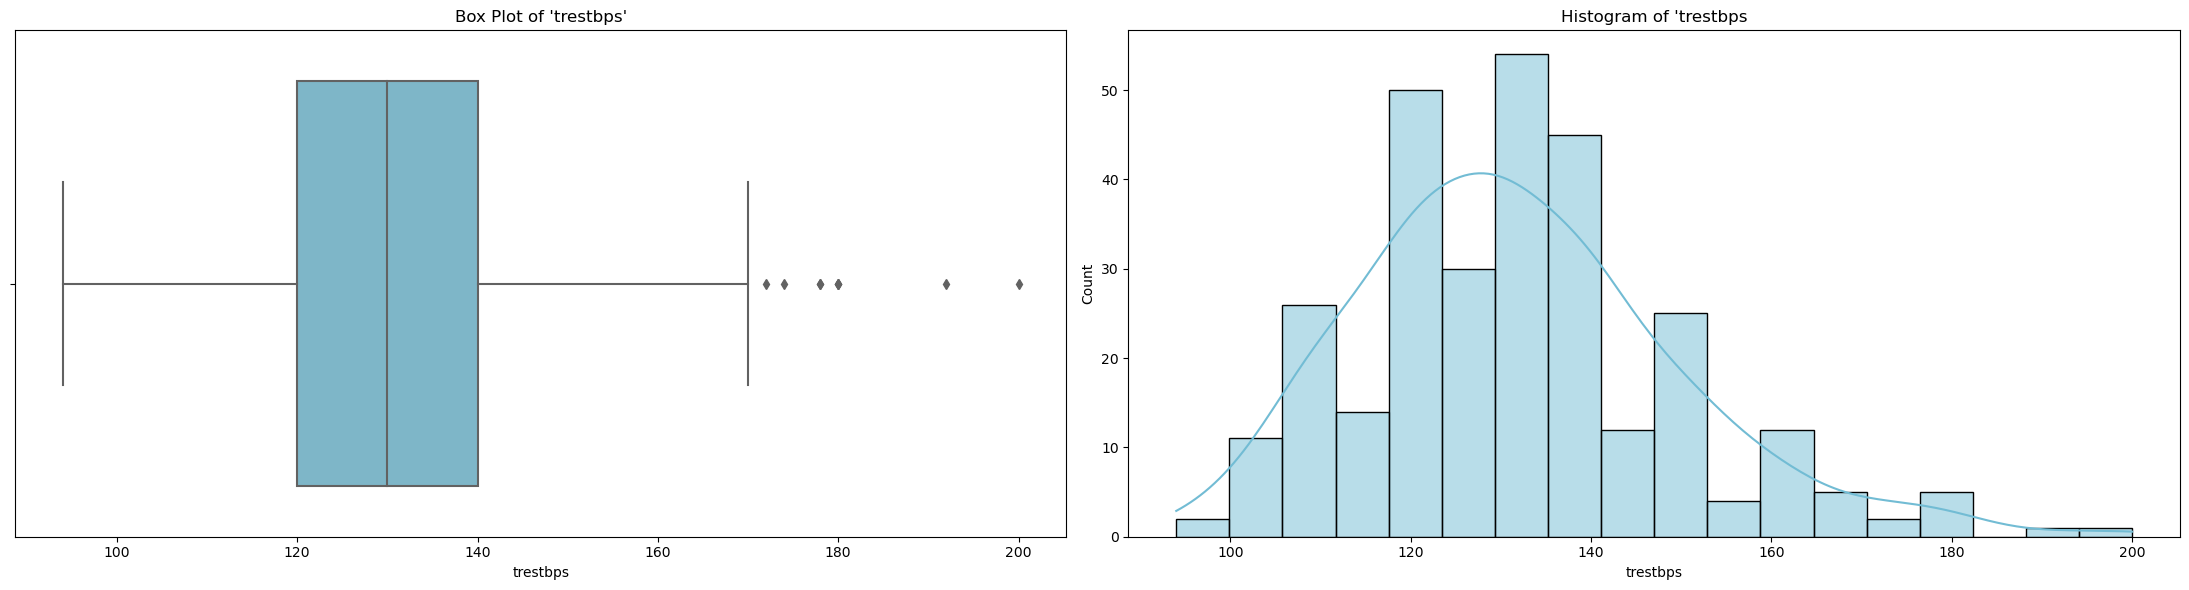

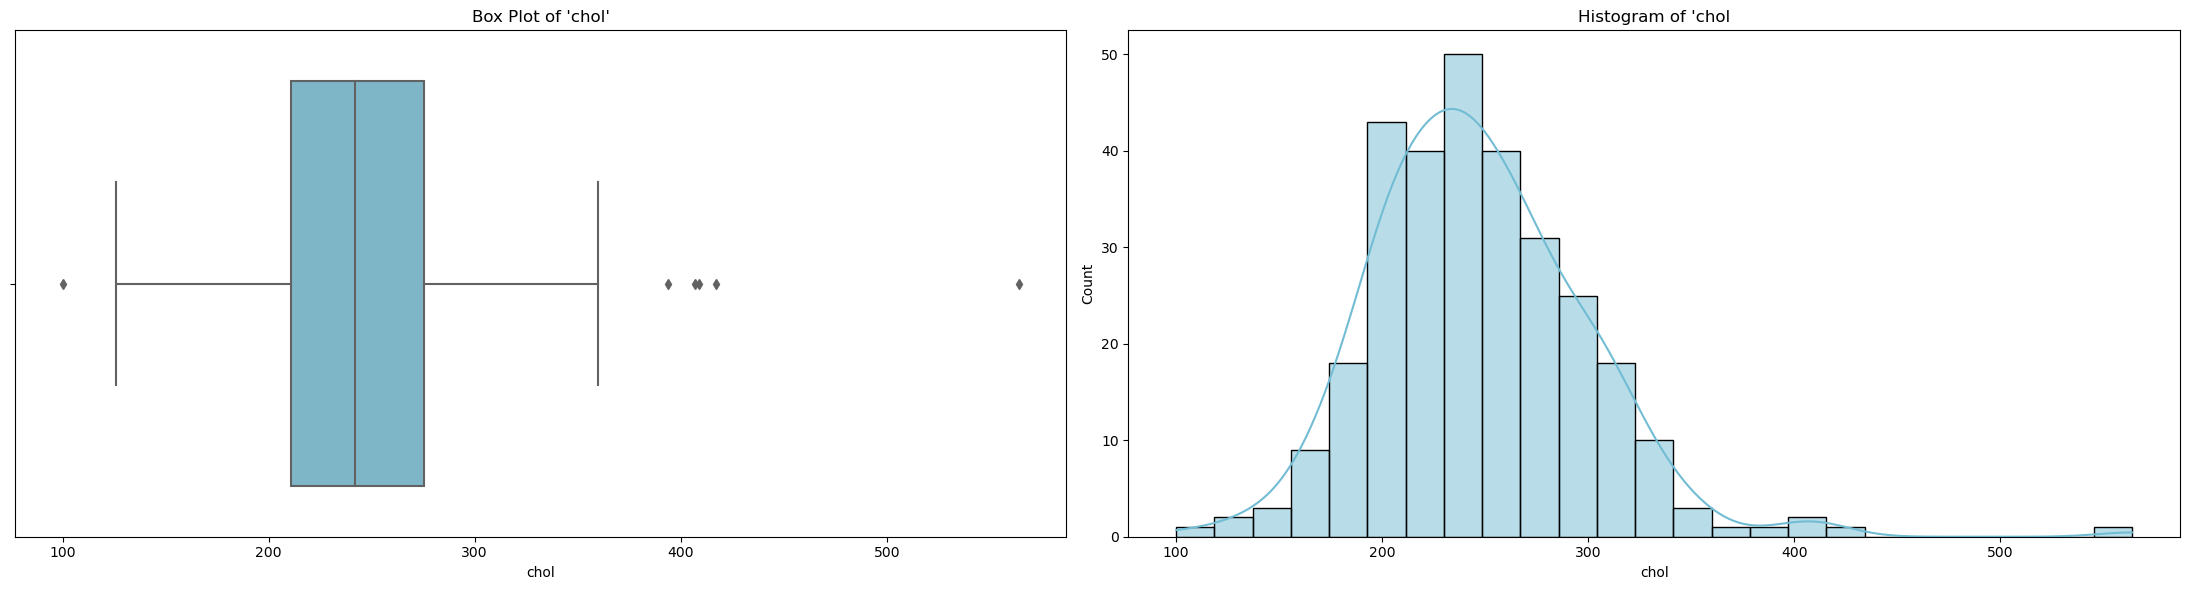

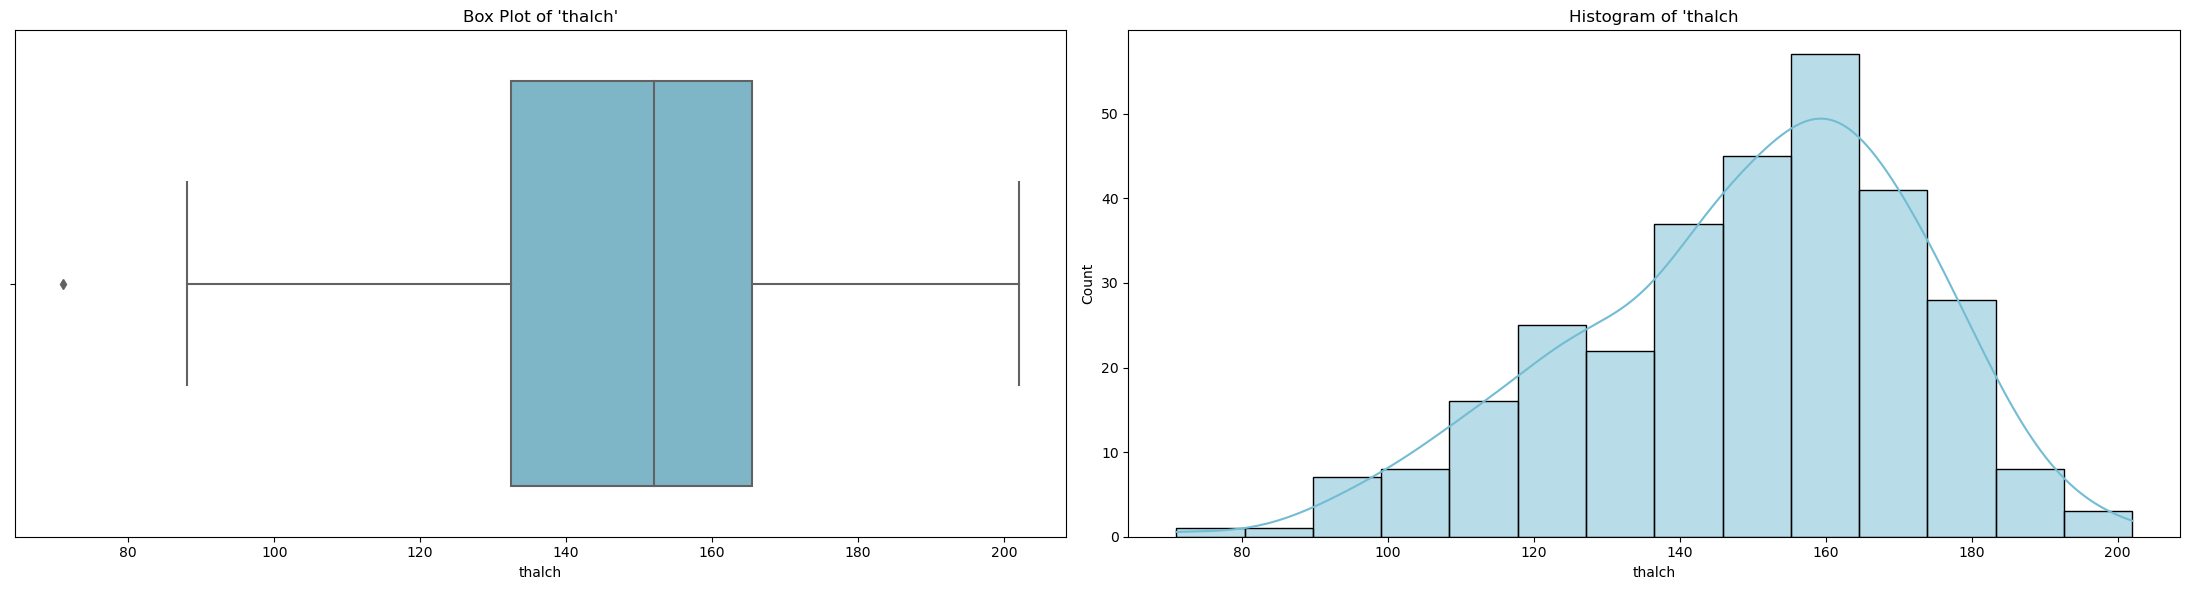

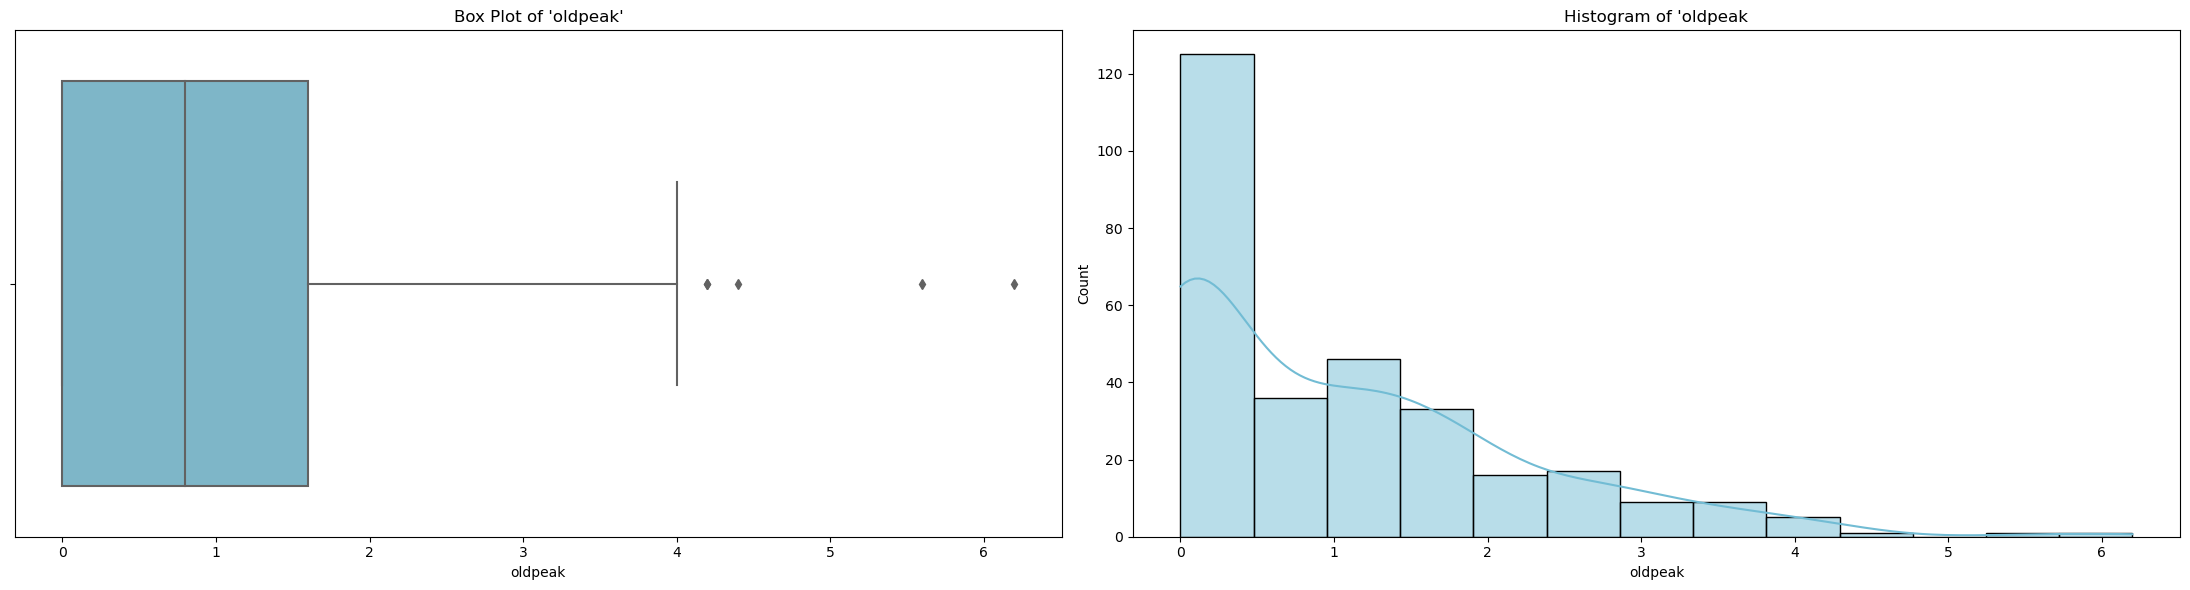

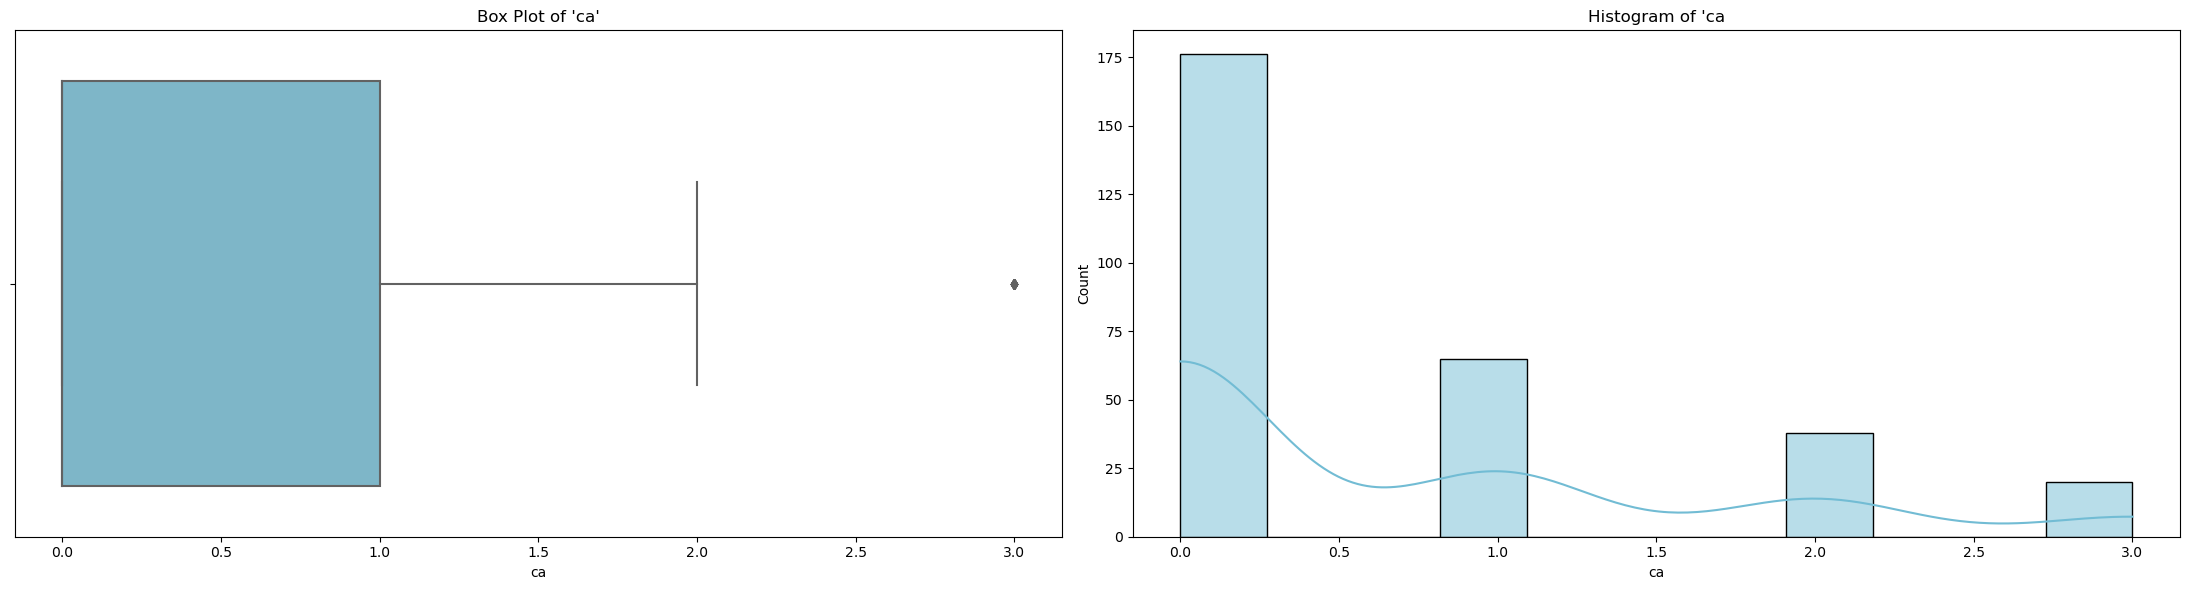

In [358]:
#define function:

def numerical_features_visualizations(col):
        fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(22,6))
        custom_color = "#72bcd4"
        # boxplots
        sns.boxplot(x=df[col], color=custom_color, ax=ax1)
        ax1.set_title(f"Box Plot of '{col}'")
        # histplots
        sns.histplot(x= df[col], kde=True, color=custom_color, ax=ax2)
        ax2.set_title(f"Histogram of '{col}")
        plt.tight_layout()

  
 #loop for numerical features
for col in numerical_features:
    numerical_features_visualizations(col)



#### Categorical Visualizations 

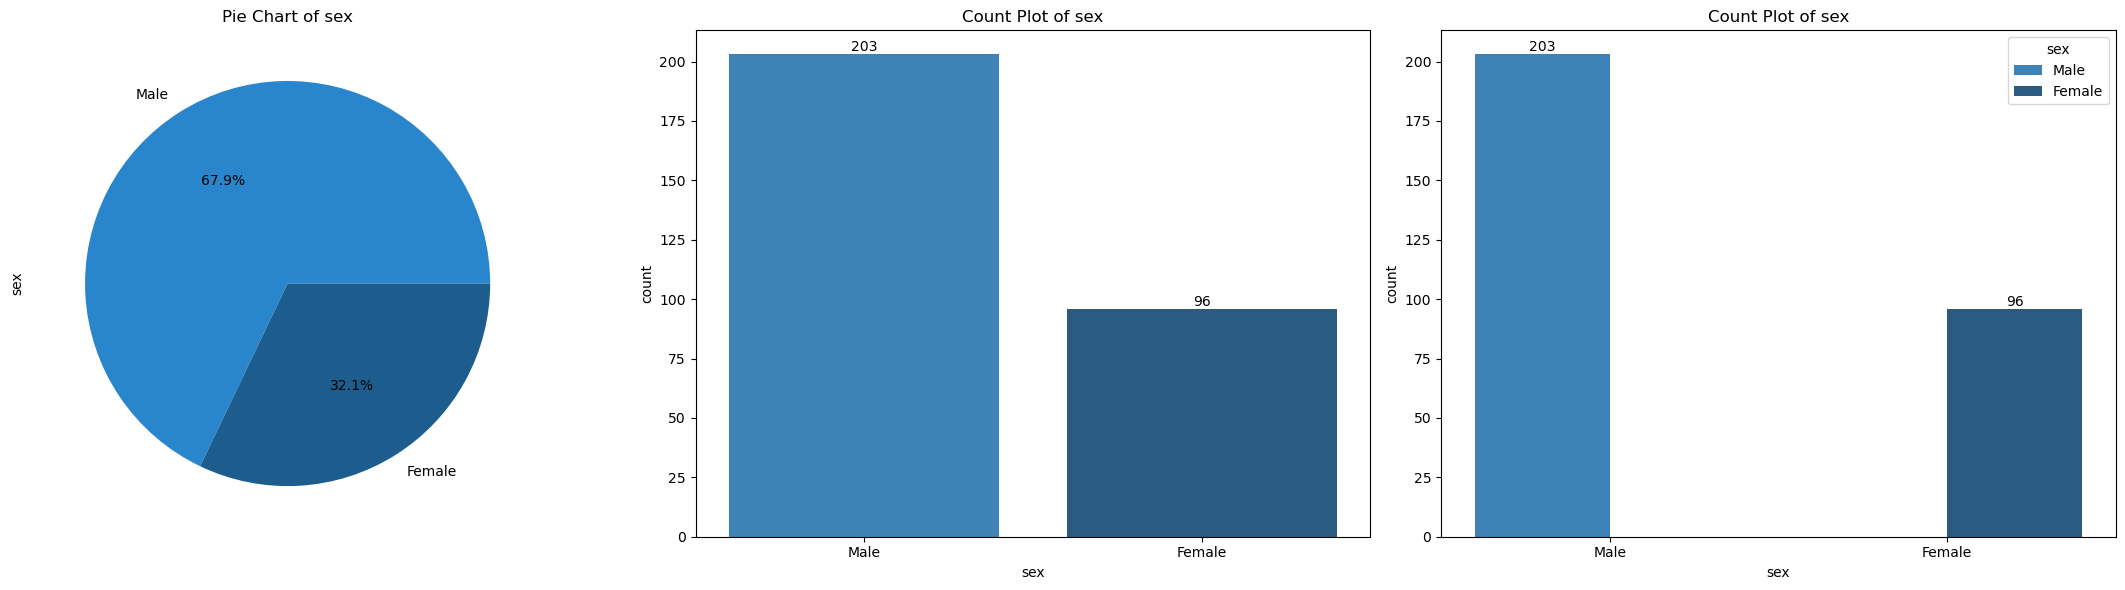

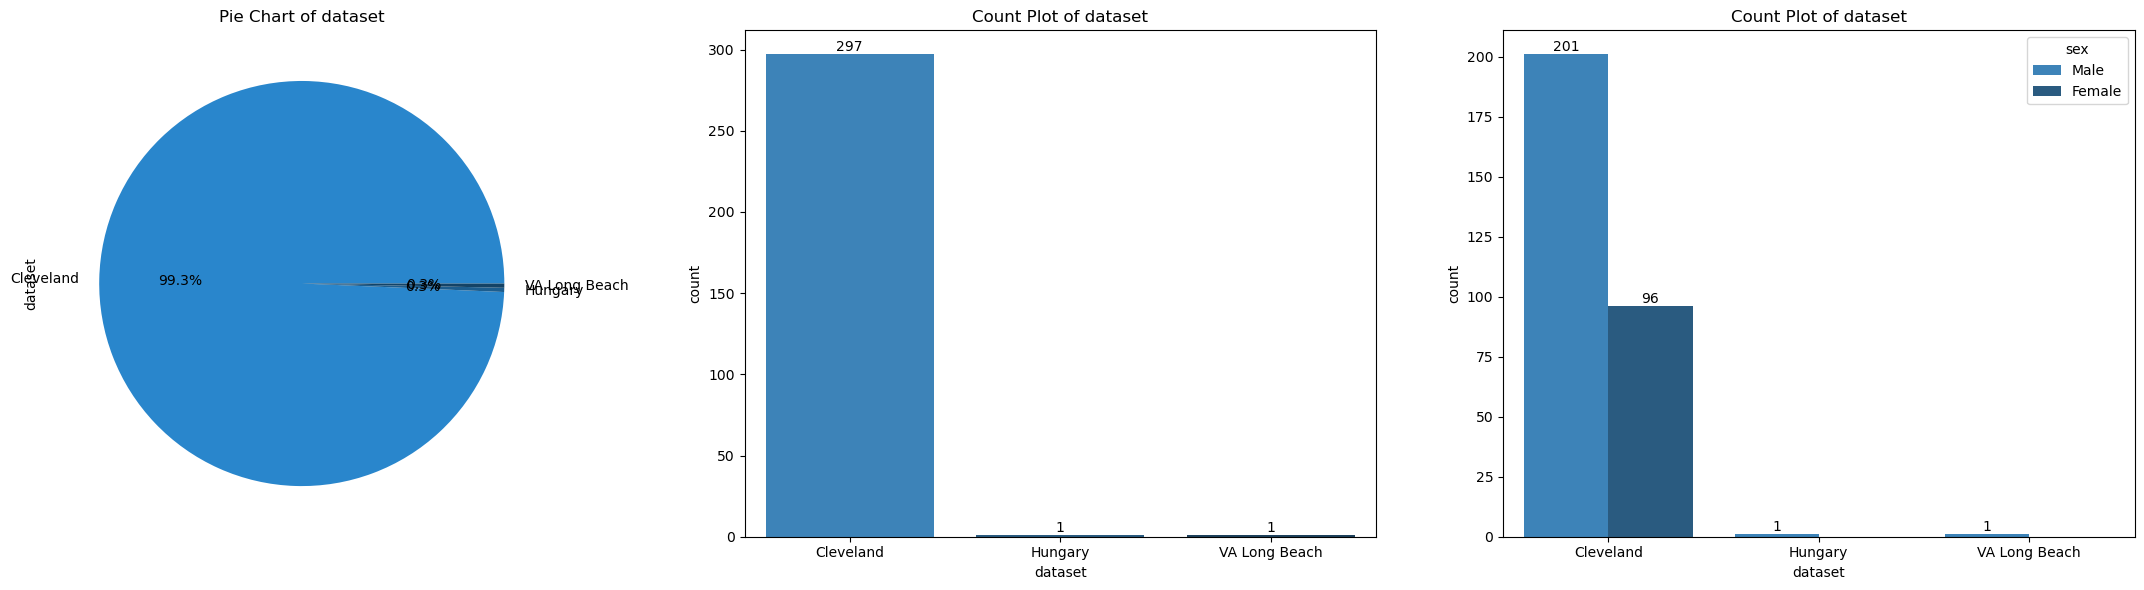

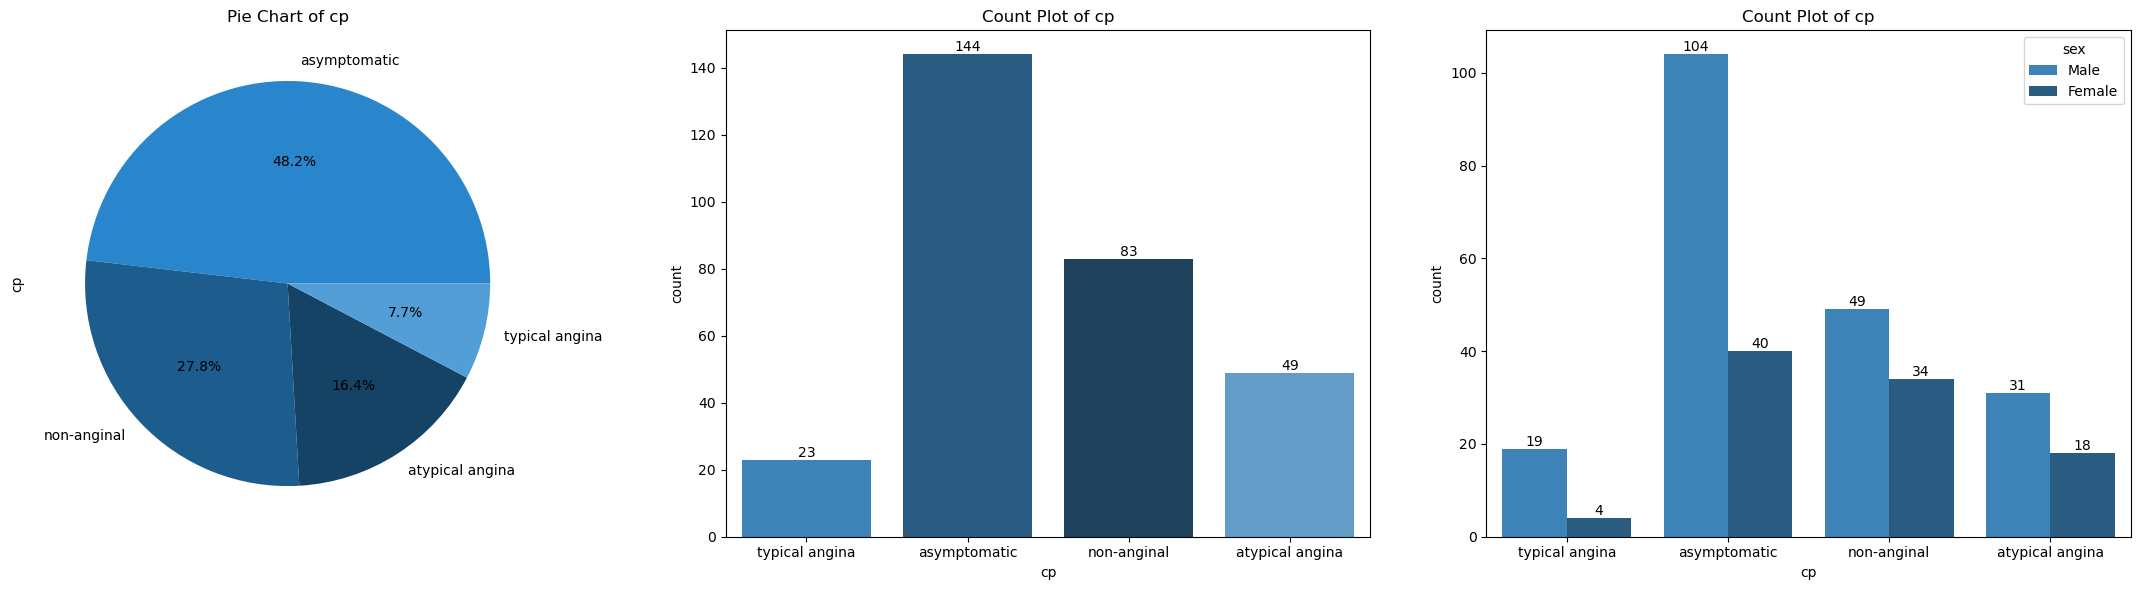

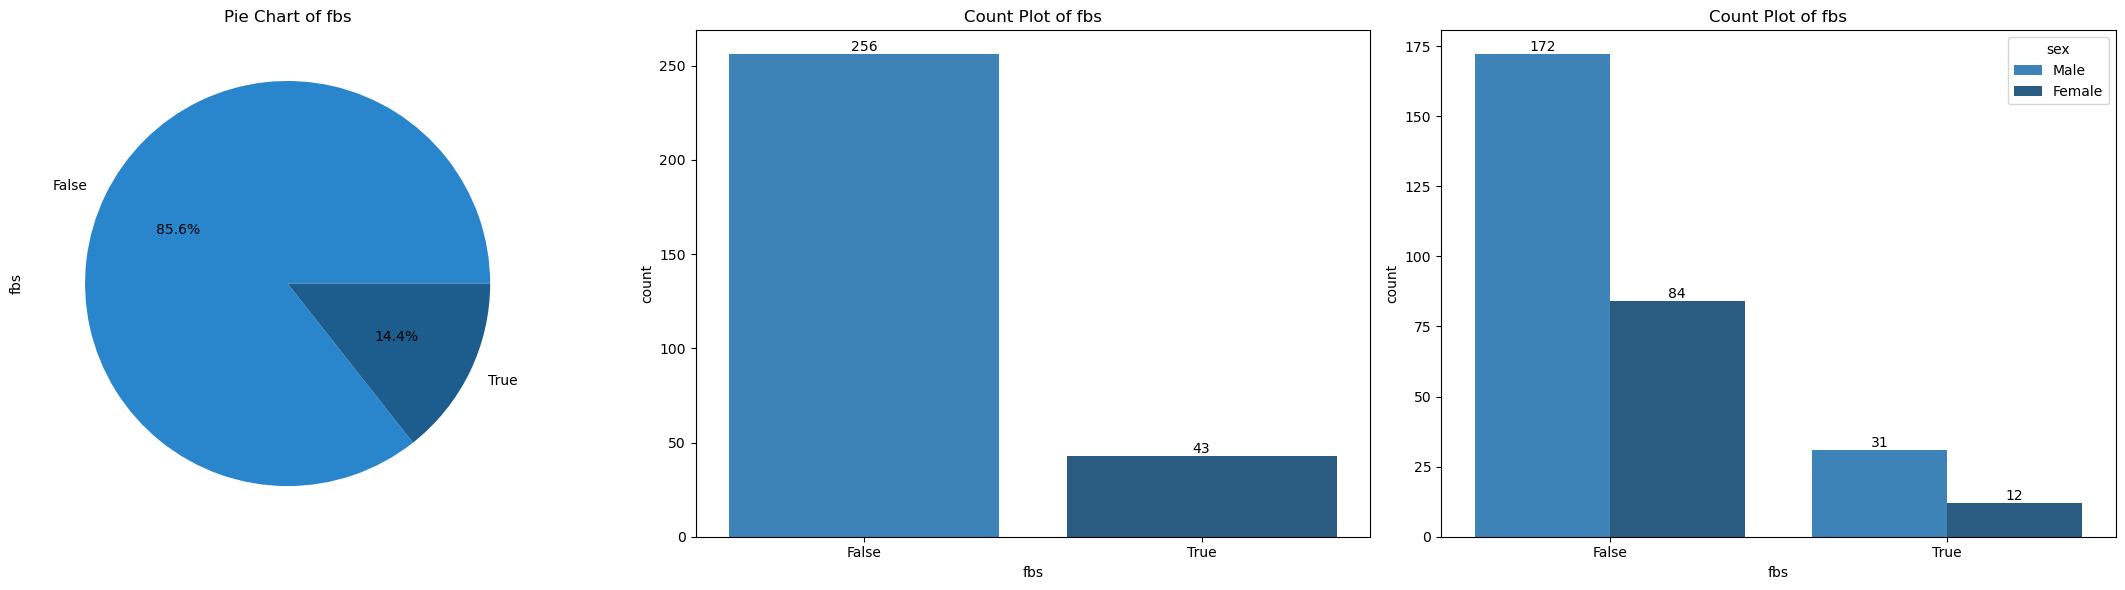

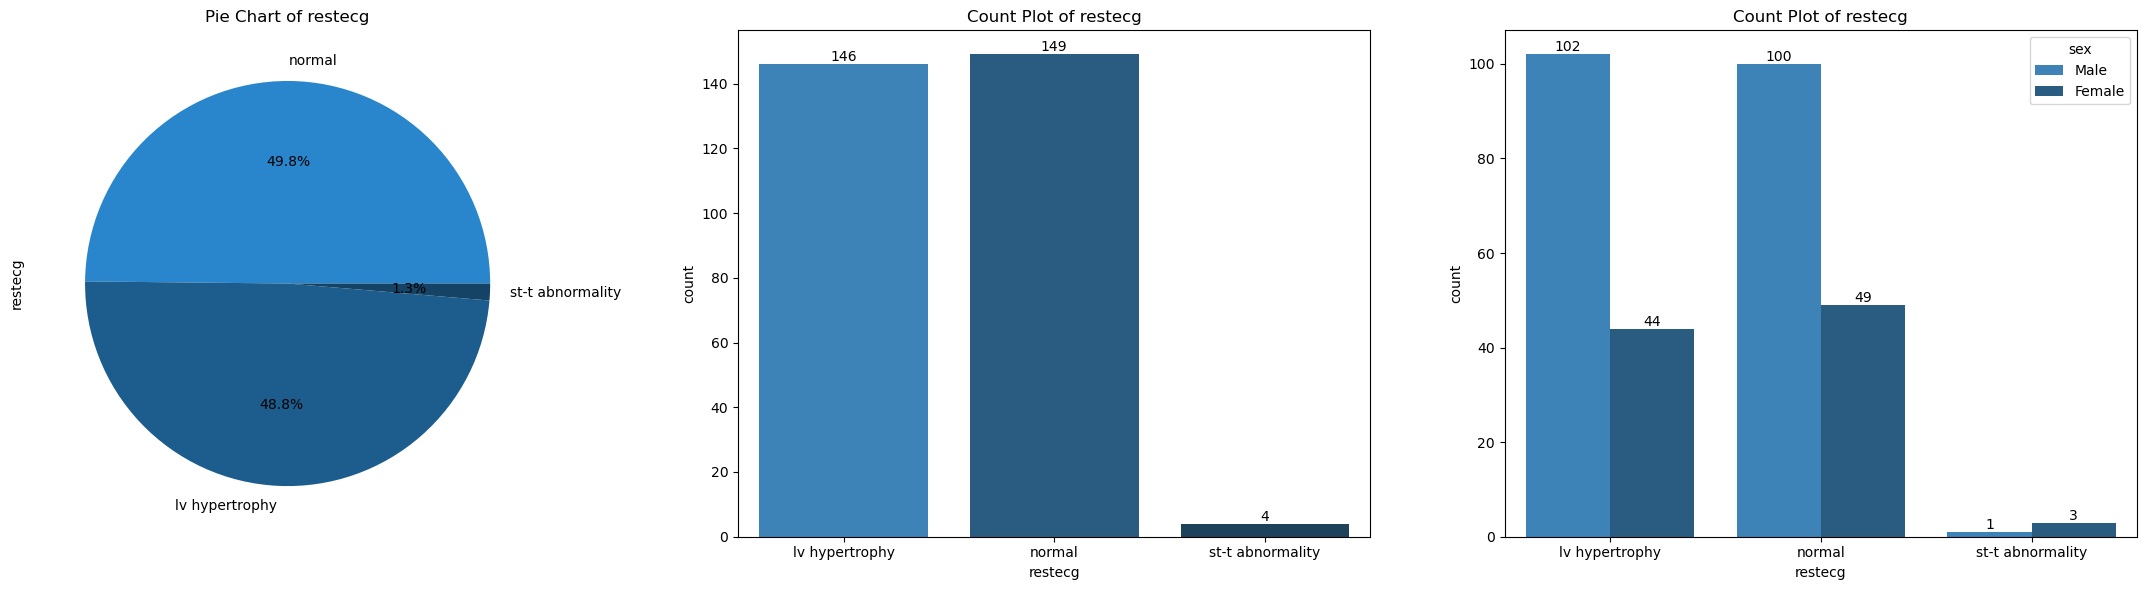

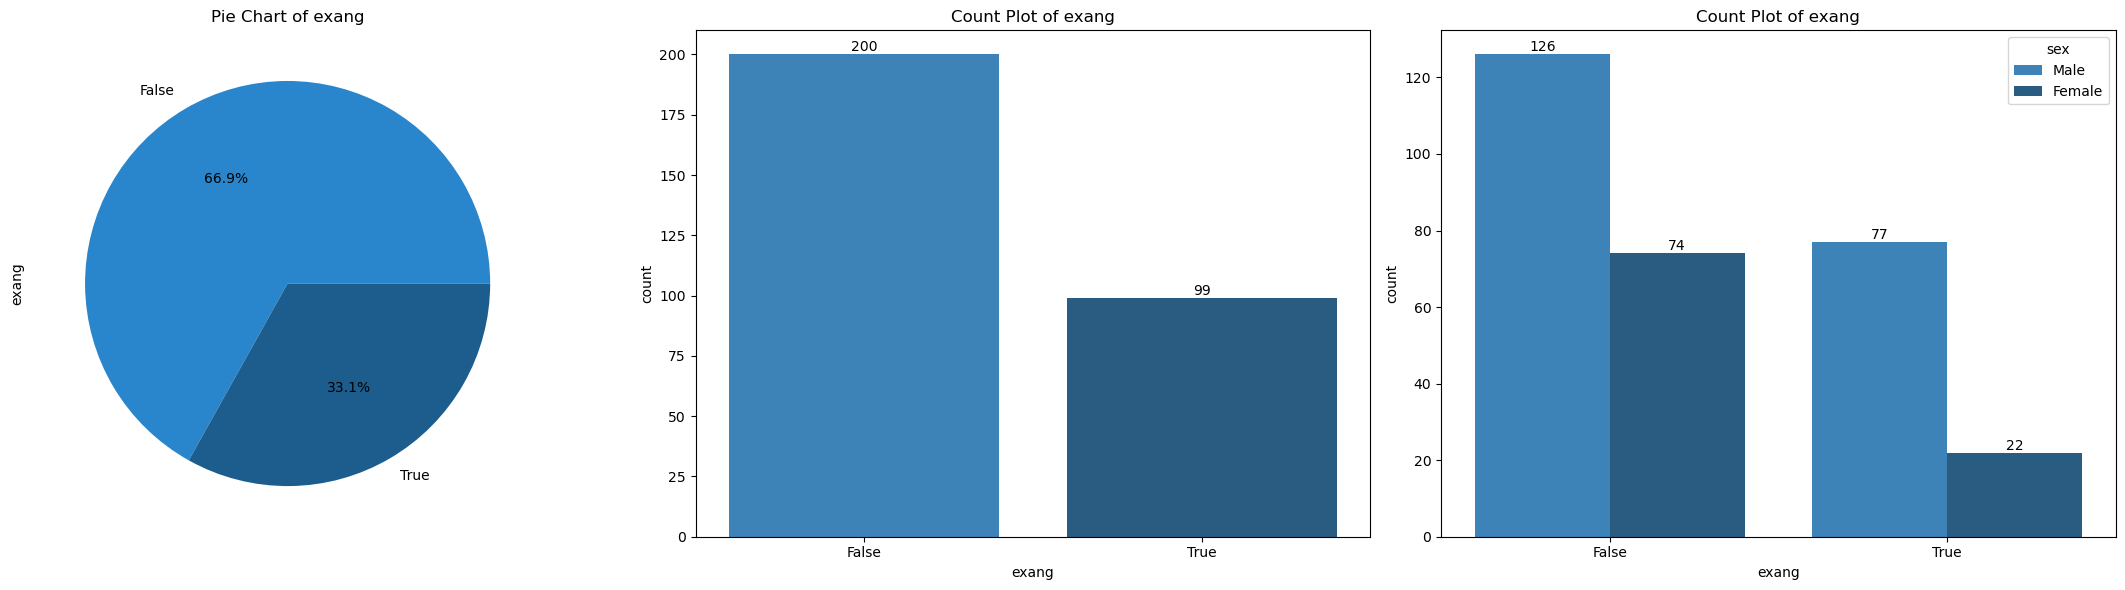

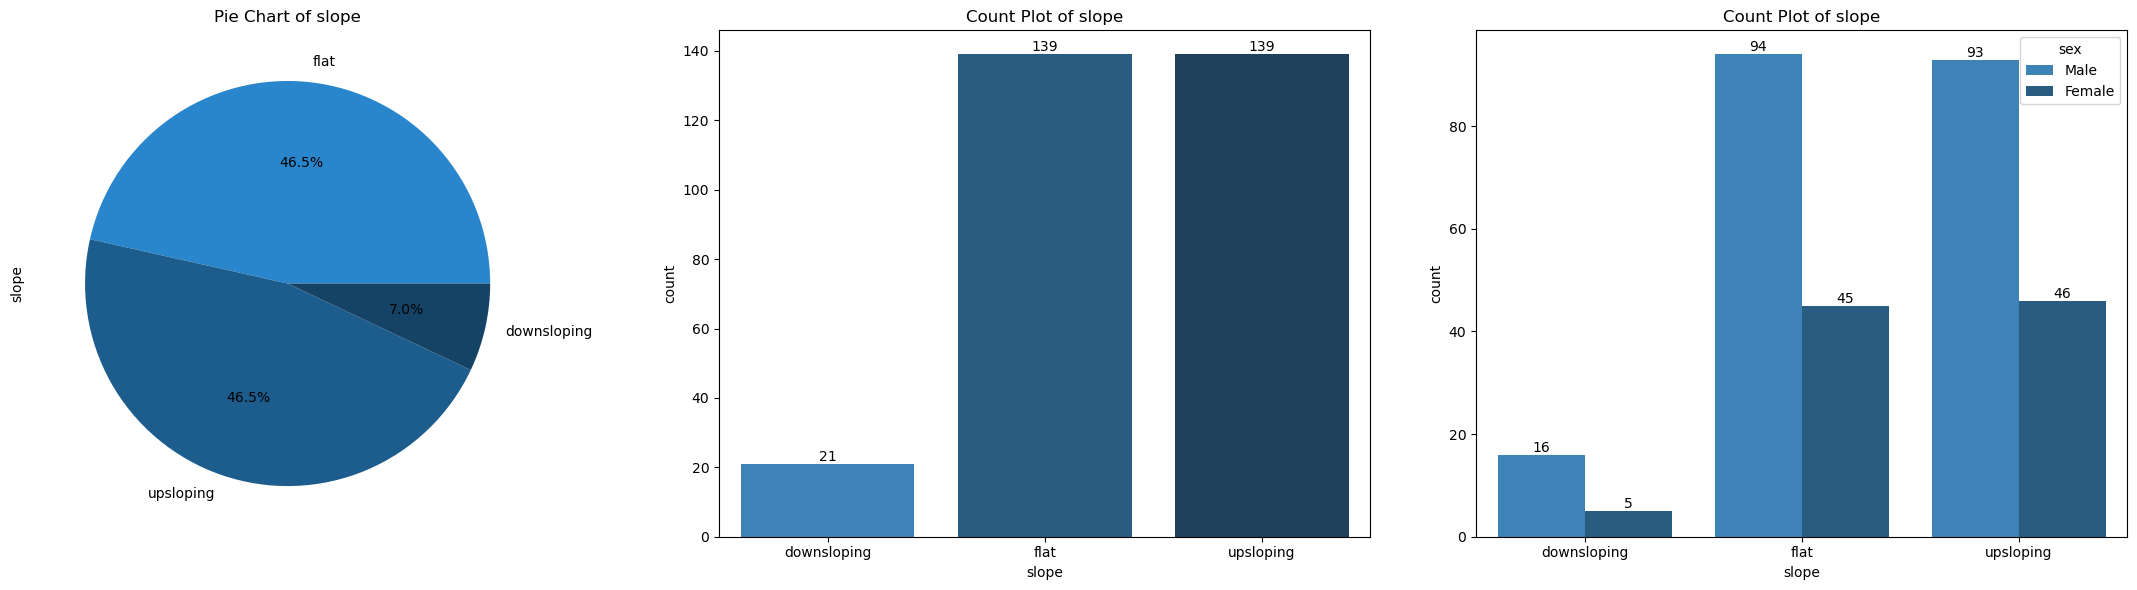

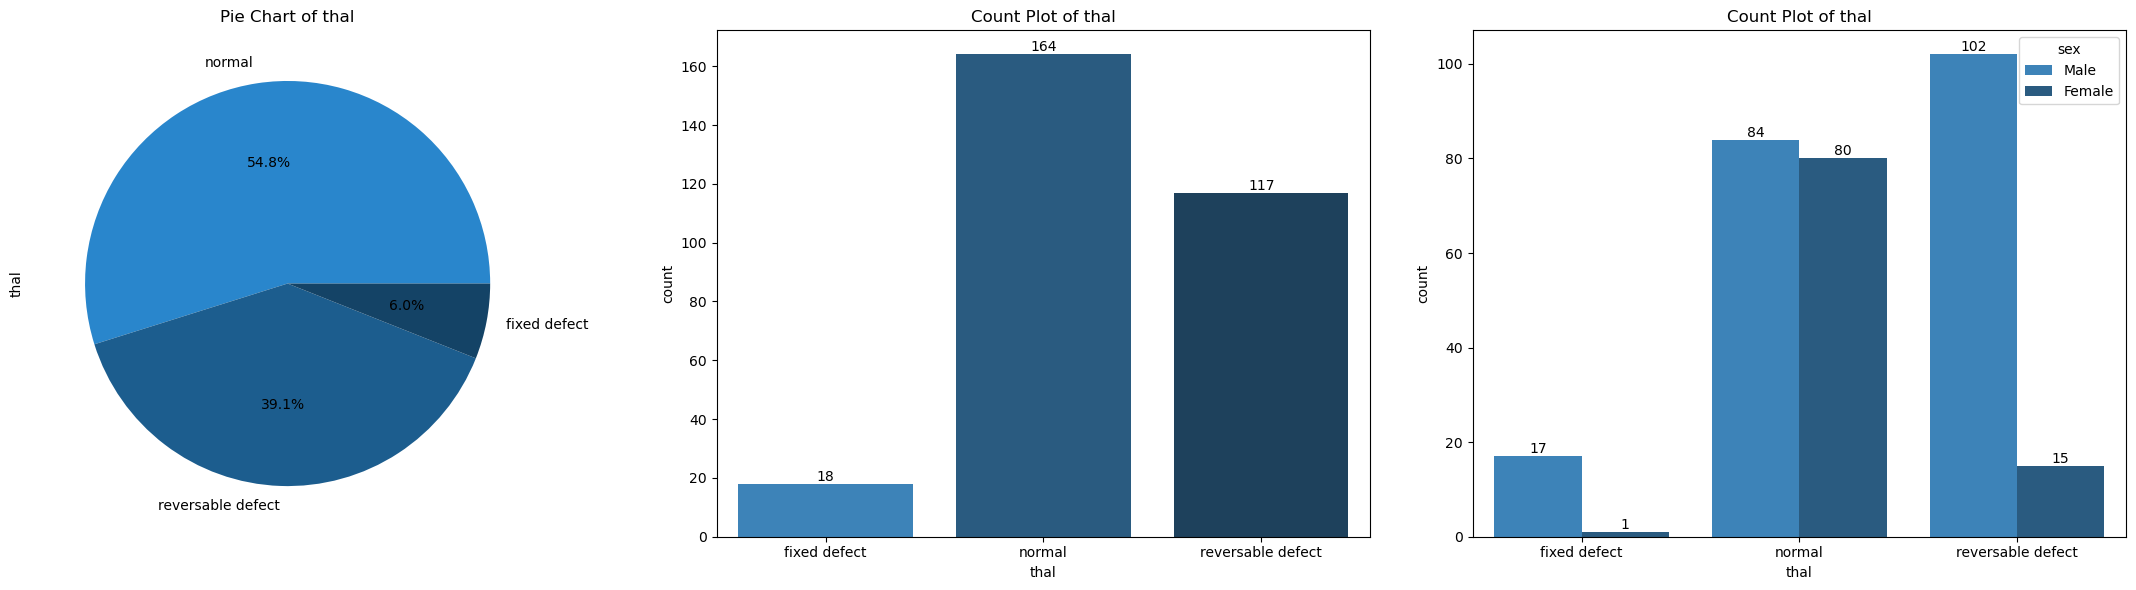

In [359]:
# define function
def categorical_features_visualizations(col):
    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(22,6))
    # pie chart
    custom_palette = ['#2986cc','#1c5d8e','#144366','#539ed6','#7eb6e0']
    df[col].value_counts().plot(kind="pie", autopct="%.1f%%", colors=custom_palette, ax=ax1)
    ax1.set_title(f"Pie Chart of {col}")
    
    # count plot
    custom_palette = ['#2986cc','#1c5d8e','#144366','#539ed6','#7eb6e0']
    figure = sns.countplot(x=df[col], palette=custom_palette, ax=ax2)
    for bar in figure.containers:
        figure.bar_label(bar)
    ax2.set_title(f"Count Plot of {col}")
    
    # count plot with hue of 'age' column
    figure = sns.countplot(x= df[col], palette=custom_palette, hue= df["sex"], ax=ax3)
    for bar in figure.containers:
        figure.bar_label(bar)
    ax3.set_title(f"Count Plot of {col}")
    plt.tight_layout()
    plt.show()


# loop for object features
for col in object_features:
    categorical_features_visualizations(col)

#### Target Variable Visualization

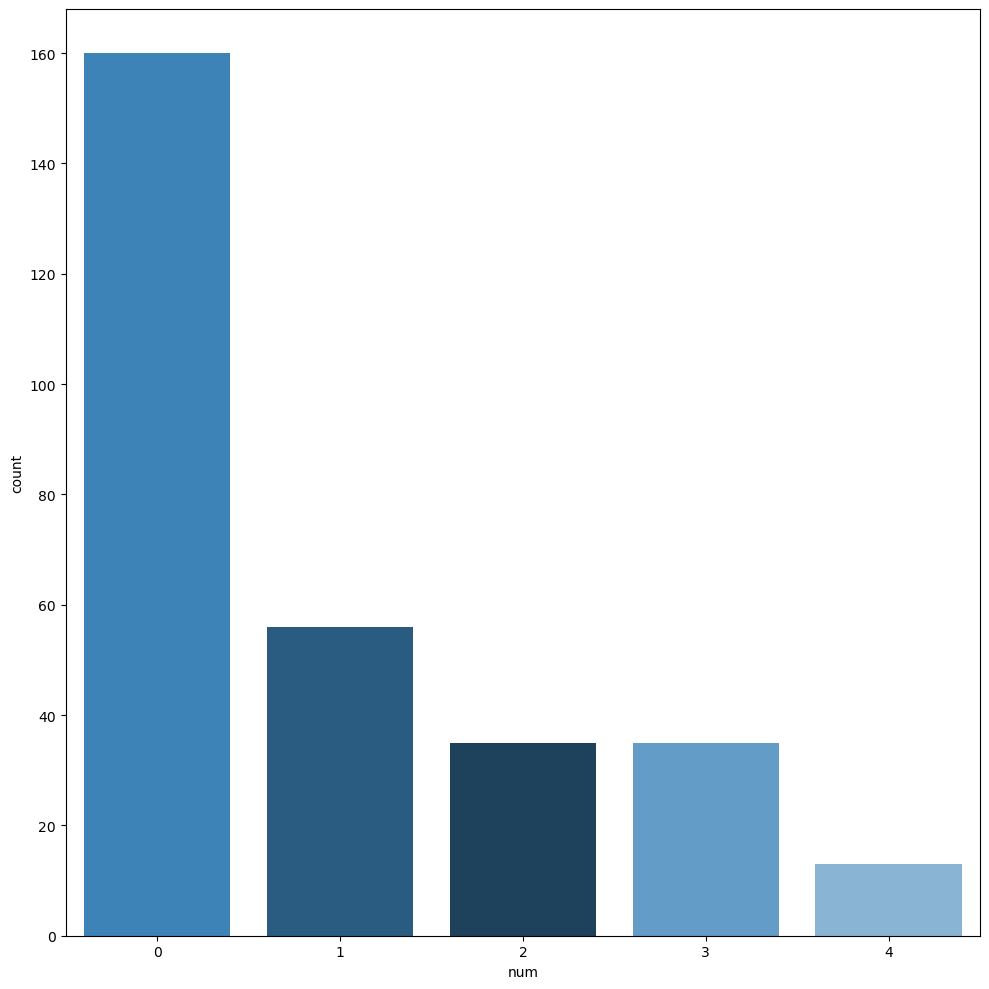

In [360]:
custom_palette = ['#2986cc','#1c5d8e','#144366','#539ed6','#7eb6e0']
sns.countplot(df['num'], palette= custom_palette)
plt.tight_layout()
plt.show()

### num(the predicted attribute/target) -  diagnosis of heart disease (angiographic disease status)
           Value 0 = no heart disease
           Value 1 = mild heart disease 
           Value 2 = moderate heart disease
           Value 3 = severe heart disease
           Value 4 = critical heart disease


### Addressing Target Variable 

#### Binary attribute is more useful for medical classification, which is why I will be changing the values to 0 = no heart disease and 1 = heart disease. 

In [361]:
df['num'].value_counts()

0    160
1     56
2     35
3     35
4     13
Name: num, dtype: int64

In [362]:
df1 = df.copy()
df1

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,301,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
301,302,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,509,47,Male,Hungary,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


In [363]:
df1['num_binary'] = df1['num'].apply(lambda x:1 if x >= 1 else 0)

In [364]:
df1['num'] = df1['num_binary']

In [365]:
df1.drop('num_binary', axis = 1, inplace = True)

In [366]:
df1['num'].value_counts()

0    160
1    139
Name: num, dtype: int64

### Pie Charts with Target Variable and Significantly Correlated Variables 

In [501]:
#Target Variable and Sex

import plotly.express as px

fig_1 = px.pie(df1.query('num == 1'), values='num', names='sex', title = 'Percent With Heart Disease by Sex', color_discrete_sequence=px.colors.sequential.Viridis)
fig_1.show()



In [502]:
#Target Variable and Chest Pain Type 

fig_2 = px.pie(df1.query('num == 1'), values='num', names='cp', title = 'Percent With Heart Disease by Chest Pain Type', color_discrete_sequence=px.colors.sequential.Viridis)
fig_2.show()

In [503]:
#Target Variable and Exercise Induced Angina 

fig_3 = px.pie(df1.query('num == 1'), values='num', names='exang', title = 'Percent With Heart Disease due to Exercise Induced Angina', color_discrete_sequence=px.colors.sequential.Viridis)
fig_3.show()


In [504]:
#Target Variable and Systolic Depression 


fig_4 = px.pie(df1.query('num == 1'), values='num', names='oldpeak', title = 'Percent With Heart Disease by Systolic Depression', color_discrete_sequence=px.colors.sequential.Viridis)
fig_4.show()



In [505]:
#Target Variable and Major Vessels

fig_5 = px.pie(df1.query('num == 1'), values='num', names='ca', title = 'Percent With Heart Disease by Major Vessels', color_discrete_sequence=px.colors.sequential.Viridis)
fig_5.show()


## III. Classification and Deep Learning Models 

### Objective: To use and test different classification and deep learning models to determine the highest evaluation metrics for heart disease diagnosis. 


### Models 

Nine Classification Models and MLP Neural Network model sourced from previous academic papers will be used to measure heart disease prediction: 

1. Random Forest
2. Logistic Regression 
3. Support Vector Machine 
4. K-Nearest Neighbor 
5. GradientBoost
6. XGBoost
7. AdaBoost
8. Decision Tree 
9. Naive Bayes 
10.Multilayer Perceptron Neural Network 

### Addressing Outliers and Preprocessing 

####  Addressing Outliers 

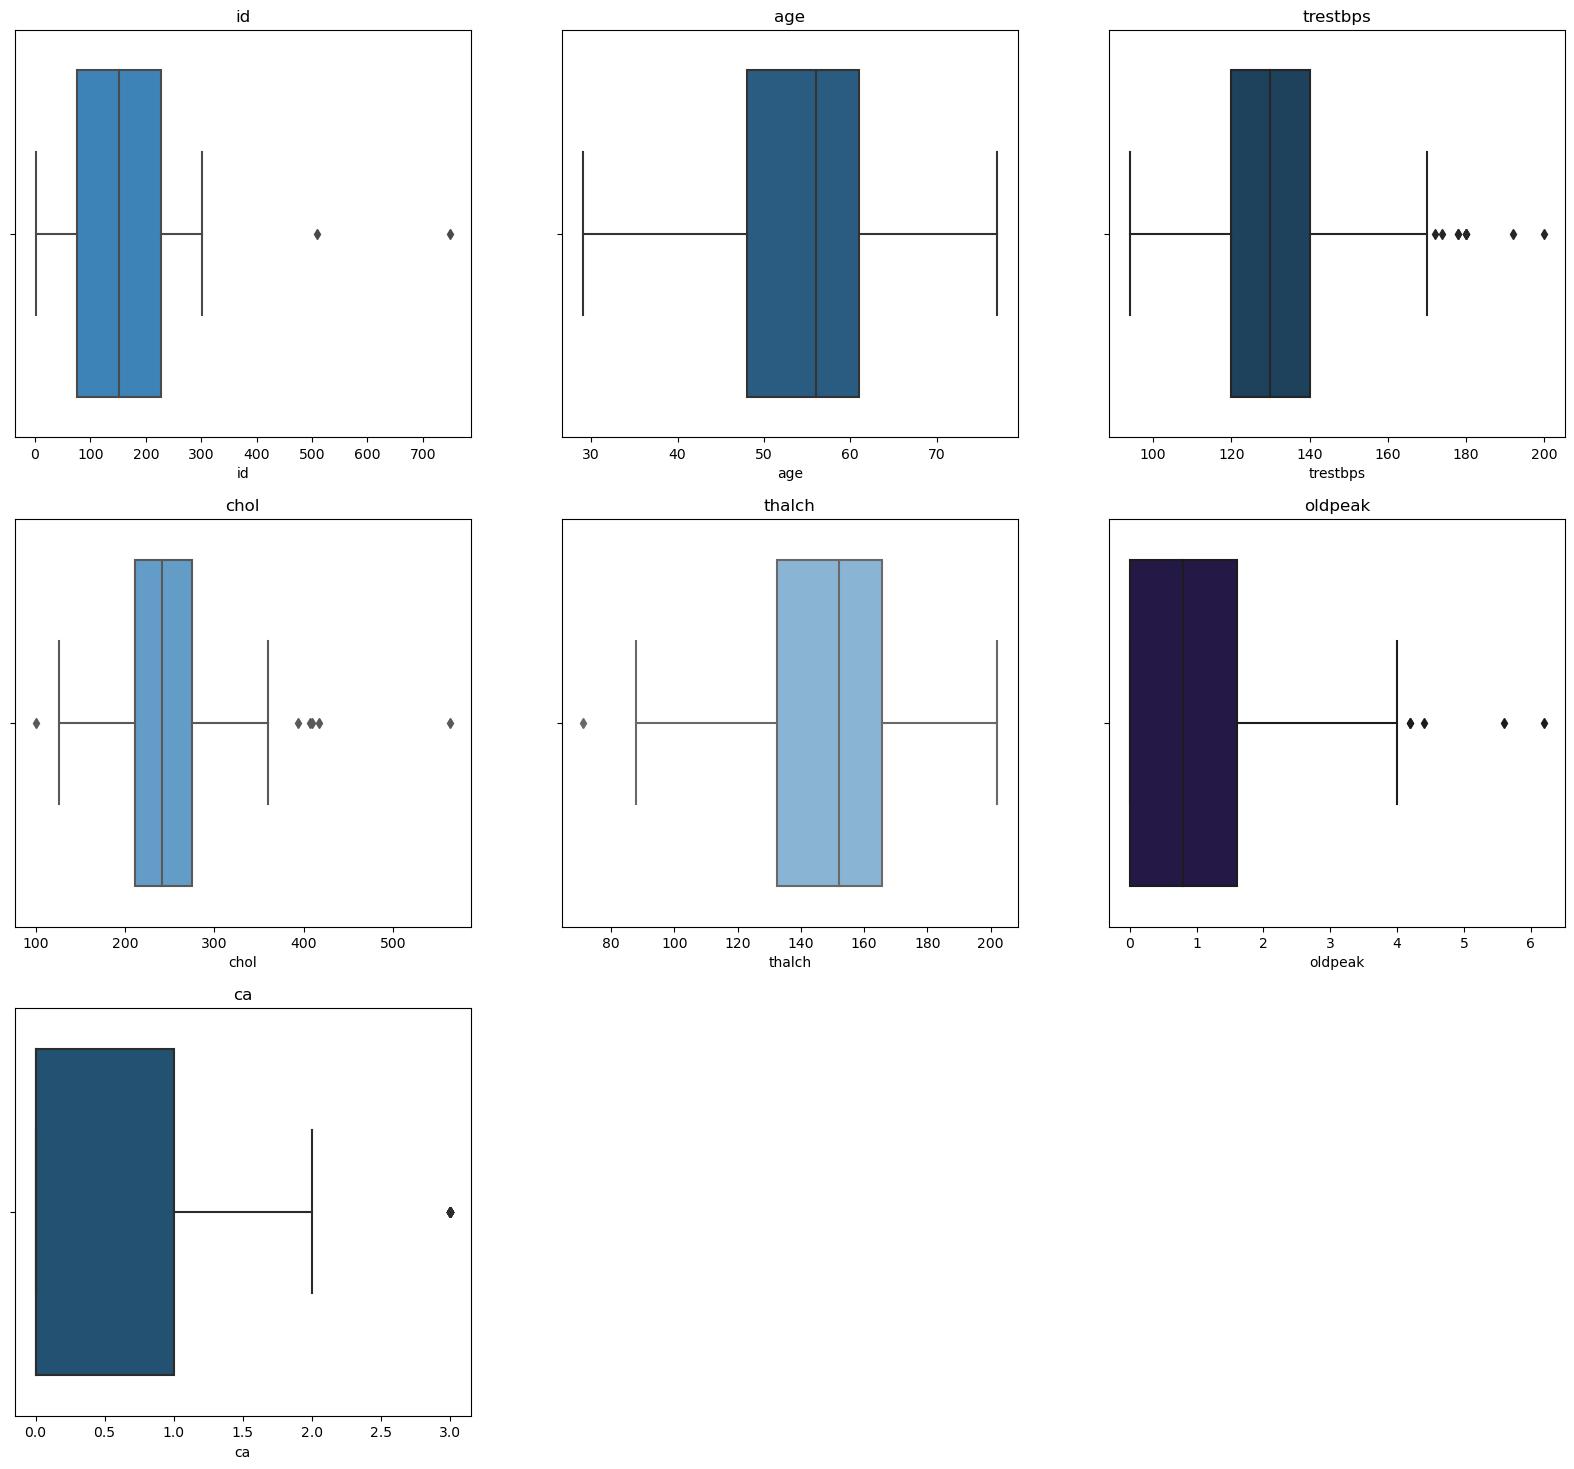

In [500]:
plt.figure(figsize=(20, 18))

colors = ['#2986cc','#1c5d8e','#144366','#539ed6','#7eb6e0','#20124d','#16537e']

for i, col in enumerate(numerical_features):
    if i < len(colors): 
        plt.subplot(3, 3, i+1)
        sns.boxplot(x=df[col], color=colors[i])
        plt.title(col)
    else:
        break  

plt.show()

In [390]:
hd = df1.copy()

In [391]:
Q1 = hd[numerical_features].quantile(0.25)
Q3 = hd[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((hd[numerical_features] < (Q1 - 1.5 * IQR)) | (hd[numerical_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

id           2
age          0
trestbps     9
chol         6
thalch       1
oldpeak      5
ca          20
dtype: int64

In [370]:
hd['trestbps'].describe()

count    299.000000
mean     131.715719
std       17.747751
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [371]:
#removing outliers in trestbps
hd = hd[hd['trestbps'] <= 170]

In [372]:
hd['ca'].describe()

count    290.000000
mean       0.675862
std        0.940314
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

In [373]:
#removing outliers in ca 
hd = hd[hd['ca'] <= 2.5]

In [374]:
hd['oldpeak'].describe()

count    270.000000
mean       0.979630
std        1.064426
min        0.000000
25%        0.000000
50%        0.650000
75%        1.600000
max        5.600000
Name: oldpeak, dtype: float64

In [375]:
hd = hd[hd['oldpeak'] <= 3.5]

In [376]:
hd['chol'].describe()

count    263.000000
mean     245.159696
std       52.044802
min      100.000000
25%      210.500000
50%      240.000000
75%      273.000000
max      564.000000
Name: chol, dtype: float64

In [377]:
#removing outliers from cholesterol 
hd = hd[hd['chol'] >= 126]
# remove values greater than 400
hd = hd[hd['chol'] <= 400]

In [378]:
hd['thalch'].describe()

count    259.000000
mean     150.571429
std       23.273519
min       71.000000
25%      136.500000
50%      155.000000
75%      168.000000
max      202.000000
Name: thalch, dtype: float64

In [379]:
#removing outliers from thalch
hd = hd[hd['thalch'] >= 80]


In [386]:
hd1 = hd.copy()
numerical = hd1.select_dtypes(include=['int64','float64']).columns
numerical
numerical 


In [387]:
categorical = hd1.select_dtypes(include=['object']).columns
categorical
qual = pd.DataFrame(data = categorical)
qual

In [388]:
select_num = ['id','age','trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
select_cat = ['sex','dataset','cp','fbs','restecg','exang','slope','thal']
target = ['num']

hd2 = select_num + select_cat + target 
hd2

In [383]:
hdd = hd1[hd2]
hdd

,id,age,trestbps,chol,thalch,oldpeak,ca,sex,dataset,cp,fbs,restecg,exang,slope,thal,num
0,1,63,145.0,233.0,150.0,2.3,0.0,Male,Cleveland,typical angina,True,lv hypertrophy,False,downsloping,fixed defect,0
2,3,67,120.0,229.0,129.0,2.6,2.0,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,reversable defect,1
3,4,37,130.0,250.0,187.0,3.5,0.0,Male,Cleveland,non-anginal,False,normal,False,downsloping,normal,0
4,5,41,130.0,204.0,172.0,1.4,0.0,Female,Cleveland,atypical angina,False,lv hypertrophy,False,upsloping,normal,0
5,6,56,120.0,236.0,178.0,0.8,0.0,Male,Cleveland,atypical angina,False,normal,False,upsloping,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,110.0,264.0,132.0,1.2,0.0,Male,Cleveland,typical angina,False,normal,False,flat,reversable defect,1
299,300,68,144.0,193.0,141.0,3.4,2.0,Male,Cleveland,asymptomatic,True,normal,False,flat,reversable defect,1
300,301,57,130.0,131.0,115.0,1.2,1.0,Male,Cleveland,asymptomatic,False,normal,True,flat,reversable defect,1
301,302,57,130.0,236.0,174.0,0.0,1.0,Female,Cleveland,atypical angina,False,lv hypertrophy,False,flat,normal,1


### Label Encoding Cateogrical data  

In [384]:
for col in hdd.columns:
      if hdd[col].dtype == "category" or hdd[col].dtype == "object":
            hdd[col] =LabelEncoder().fit_transform(hdd[col])
      else:
          pass

### Train/Test Split and Scaling 

In [463]:
#Train/Test Split 
X = hdd.drop('num', axis = 1)
y = hdd['num']

objects = X.select_dtypes(include=['object']).columns
numbers = X.select_dtypes(include=['int64','float64']).columns 




#preprocessing 

#preprocessor= ColumnTransformer(transformers = [('numbers',StandardScaler(), numbers), 
                                                    #('objects', OneHotEncoder(), objects)
                                                  #])

        
#preprocessor =ColumnTransformer(transformers = [('objects', OneHotEncoder(), objects)], remainder = 'passthrough')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


#X_train_scaled = preprocessor.fit_transform(X_train)

#X_test_scaled = preprocessor.transform(X_test)

scaler = StandardScaler()

X_test_scaled
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Explanation of Metrics 
#### There are four core evaluation metrics used in classification models and are commonly important in medical classification models: Accuracy, Precision, Recall, and F1 Scores. 

#### Accuracy: Accuracy is the ratio between number of correct predictions over total predictions. 

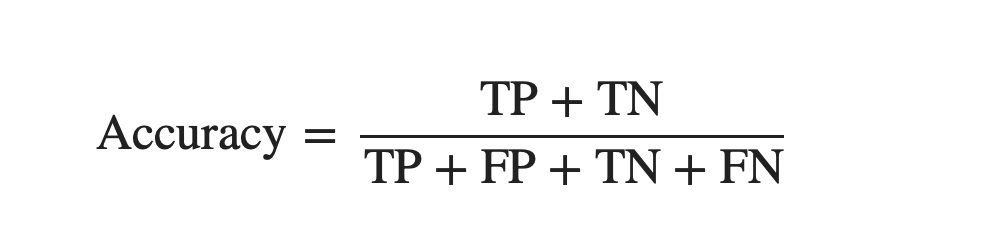

#### Precision: Precision(positive predictive value) is the measure of the number of true positive predictions to the total number of  positive predictions (true or false). 

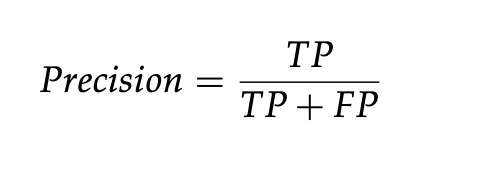

#### Recall: Recall(sensitivity) is the measure of correctly identifying true positives from all the actual (true or false) positive predictions. 

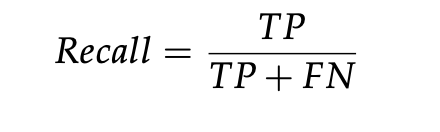

#### F1 Score: F1-Score is a combination of precision and recall; a combination of metrics. 

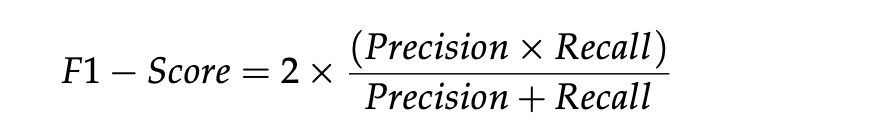

#### These evaluation metrics will be used to investigate each individual model's performance. 

### Baseline Model

In [454]:
#Baseline 

#Baseline Model with LogisticRegression

lor= LogisticRegression(random_state = 42)

#Fit the Model 


lor_fit = lor.fit(X_train_scaled, y_train)

#Y Pred

y_pred =  lor.predict(X_test_scaled)

#Train Accuracy

y_pred_lor_train = lor.predict(X_train_scaled)
accuracy_lor_train = accuracy_score(y_train, y_pred_lor_train)
precision_lor_train = precision_score(y_train, y_pred_lor_train)
recall_lor_train = recall_score(y_train, y_pred_lor_train)
f1_lor_train = f1_score(y_train, y_pred_lor_train)



#Test Accuracy

y_pred_lor = lor.predict(X_test_scaled)
accuracy_lor_test = accuracy_score(y_test,y_pred_lor)
accuracy_lor_test

#Eval Metrics 


precision  = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,)

print('Baseline Train Accuracy:',accuracy_lor_train)
print('Baseline Train Precision:', precision_lor_train)
print('Baseline Train Recall:', recall_lor_train)
print('Baseline Train F1:', f1_lor_train)
print('Baseline Test Accuracy:', accuracy_lor_test)
print('Baseline Test Precision:', precision)
print('Baseline Test Recall:',recall)
print('Baseline Test F1:', f1)


Baseline Train Accuracy: 0.9077669902912622
Baseline Train Precision: 0.9452054794520548
Baseline Train Recall: 0.8214285714285714
Baseline Train F1: 0.8789808917197452
Baseline Test Accuracy: 0.7884615384615384
Baseline Test Precision: 0.8235294117647058
Baseline Test Recall: 0.6363636363636364
Baseline Test F1: 0.717948717948718


### Classification Models

#### Random Forest 

In [420]:
#Initialize Random Forest 

rf = RandomForestClassifier(random_state=42)


#Hyperparameter grid 

rf_params = {
         'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20],
         'criterion': ['gini', 'entropy','log_loss'],
         'min_samples_split':[5,10,25],
         'min_samples_leaf': [5,10,25],
         'max_features': ['sqrt','log2','None']}
    


#Initialize and fit GridSearchObjectCV

rf_grid = GridSearchCV(rf, param_grid = rf_params, cv = 5, scoring = 'roc_auc')
rf_grid.fit(X_train_scaled, y_train)


#Fitting Time 

rf_start_opt = time.time()
rf_end_opt = time.time()
rf_time_opt = rf_end_opt - rf_start_opt


#Best Indicators 

print('Best Parameters:',rf_grid.best_params_)
print('Best Cross-Validated Score:',rf_grid.best_score_)
print('Best Estimator:',rf_grid.best_estimator_)

best_opt_rf = rf_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_rf_pred_train = best_opt_rf.predict(X_train_scaled)
accuracy_opt_rf_train = accuracy_score(y_train,y_opt_rf_pred_train)
precision_score_rf_train = precision_score(y_train, y_opt_rf_pred_train)
recall_score_rf_train = recall_score(y_train, y_opt_rf_pred_train)
f1_score_rf_train = f1_score(y_train, y_opt_rf_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_rf_pred = best_opt_rf.predict(X_test_scaled)
accuracy_opt_rf = accuracy_score(y_test,y_opt_rf_pred)
precision_score_rf = precision_score(y_test, y_opt_rf_pred)
recall_score_rf = recall_score(y_test, y_opt_rf_pred)
f1_score_rf = f1_score(y_test, y_opt_rf_pred)

print('Train Accuracy:', accuracy_opt_rf_train)
print('Test Accuracy:', accuracy_opt_rf)
print('Test Precision:',precision_score_rf)
print('Test Recall:', recall_score_rf)
print('Test F1 Score:', f1_score_rf)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validated Score: 0.9228235294117647
Best Estimator: RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=42)
Train Accuracy: 0.9223300970873787
Test Accuracy: 0.7307692307692307
Test Precision: 0.75
Test Recall: 0.5454545454545454
Test F1 Score: 0.631578947368421


#### Logistic Regression

In [421]:
#Initialize Logistic Regression

lr = LogisticRegression(random_state = 42, max_iter = 1000)

#Hyperparameter grid 
lr_params = {
    'C': [0.1,0.5,1.0,2.0],
    'solver': ['lbfgs','liblinear', 'sag'],
     'penalty': ['l1', 'l2']
    
}



#Initialize the GridSearchObject CV
lr_grid = GridSearchCV(lr, param_grid = lr_params, cv = 5, scoring = 'roc_auc')

#Tracking Time 
lr_start_opt = time.time()
lr_end_opt = time.time()
lr_time_opt = lr_end_opt - lr_start_opt 

#Fit the model 

lr_grid.fit(X_train_scaled, y_train)

#Best indicators 

print('Best Parameters:', lr_grid.best_params_)
print('Best Cross-Validated Score:',lr_grid.best_score_)
print('Best Estimator:',lr_grid.best_estimator_)

best_opt_lr = lr_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_lr_pred_train = best_opt_lr.predict(X_train_scaled)
accuracy_opt_lr_train = accuracy_score(y_train,y_opt_lr_pred_train)
precision_score_lr_train = precision_score(y_train, y_opt_lr_pred_train)
recall_score_lr_train = recall_score(y_train, y_opt_lr_pred_train)
f1_score_lr_train = f1_score(y_train, y_opt_lr_pred_train)


#Model Performance Measures-Test Accuracy

y_opt_lr_pred = best_opt_lr.predict(X_test_scaled)
accuracy_opt_lr = accuracy_score(y_test,y_opt_lr_pred)
precision_score_lr = precision_score(y_test, y_opt_lr_pred)
recall_score_lr = recall_score(y_test, y_opt_lr_pred)
f1_score_lr = f1_score(y_test, y_opt_lr_pred)



print('Train Accuracy:',accuracy_opt_lr_train)
print('Test Accuracy:', accuracy_opt_lr)
print('Test Precision:',precision_score_lr)
print('Test Recall:',recall_score_lr)
print('Test F1 Score:', f1_score_lr)


Best Parameters: {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validated Score: 0.9243529411764706
Best Estimator: LogisticRegression(C=0.5, max_iter=1000, random_state=42, solver='liblinear')
Train Accuracy: 0.9077669902912622
Test Accuracy: 0.7884615384615384
Test Precision: 0.8235294117647058
Test Recall: 0.6363636363636364
Test F1 Score: 0.717948717948718


#### Support Vector Machine 

In [422]:
#Initialize SVM

svm = SVC()


#Hyperparameter grid 

svm_params = {
        'kernel': ['rbf','poly','sigmoid'],
       'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
         'max_iter': [50,100,500]}
#Initialize and fit GridSearchObjectCV
svm_grid = GridSearchCV(svm, param_grid = svm_params, cv = 5, scoring = 'roc_auc')
svm_grid.fit(X_train_scaled, y_train)


#Fitting Time 

svm_start_opt = time.time()
svm_end_opt = time.time()
svm_time_opt = svm_end_opt - svm_start_opt


#Best Indicators 

print('Best Parameters:',svm_grid.best_params_)
print('Best Cross-Validated Score:',svm_grid.best_score_)
print('Best Estimator:', svm_grid.best_estimator_)

best_opt_svm = svm_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_svm_pred_train = best_opt_svm.predict(X_train_scaled)
accuracy_opt_svm_train = accuracy_score(y_train,y_opt_svm_pred_train)
precision_score_svm_train = precision_score(y_train, y_opt_svm_pred_train)
recall_score_svm_train = recall_score(y_train, y_opt_svm_pred_train)
f1_score_svm_train = f1_score (y_train, y_opt_svm_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_svm_pred = best_opt_svm.predict(X_test_scaled)
accuracy_opt_svm = accuracy_score(y_test,y_opt_svm_pred)
precision_score_svm = precision_score(y_test, y_opt_svm_pred)
recall_score_svm = recall_score(y_test, y_opt_svm_pred)
f1_score_svm = f1_score(y_test, y_opt_svm_pred)

print('Train Accuracy:',accuracy_opt_svm_train)
print('Test Accuracy:',accuracy_opt_svm)
print('Test Precision:',precision_score_svm)
print('Test Recall:',recall_score_svm)
print('Test F1 Score:',f1_score_svm)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 100}
Best Cross-Validated Score: 0.9173725490196079
Best Estimator: SVC(C=10, kernel='sigmoid', max_iter=100)
Train Accuracy: 0.7912621359223301
Test Accuracy: 0.8461538461538461
Test Precision: 0.85
Test Recall: 0.7727272727272727
Test F1 Score: 0.8095238095238095


#### K-Nearest Neighbhors (KNN) 

In [423]:
#Initialize KNN 

knn = KNeighborsClassifier()


#Hyperparameter grid 

knn_params = {
    'n_neighbors': [3,5,7,11,13,15,17,19,21]
}


#Initialize and fit GridSearchObjectCV

knn_grid = GridSearchCV(knn, param_grid = knn_params, cv = 5, scoring = 'roc_auc')
knn_grid.fit(X_train_scaled, y_train)


#Fitting Time 

knn_start_opt = time.time()
knn_end_opt = time.time()
knn_time_opt = knn_end_opt - knn_start_opt


#Best Indicators 

print('Best Parameters:',knn_grid.best_params_)
print('Best Cross-Validated Score:', knn_grid.best_score_)
print('Best Estimator', knn_grid.best_estimator_)

best_opt_knn = knn_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_knn_pred_train = best_opt_knn.predict(X_train_scaled)
accuracy_opt_knn_train = accuracy_score(y_train,y_opt_knn_pred_train)
precision_score_knn_train = precision_score(y_train, y_opt_knn_pred_train)
recall_score_knn_train = recall_score(y_train, y_opt_knn_pred_train)
f1_score_knn_train = f1_score(y_train, y_opt_knn_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_knn_pred = best_opt_knn.predict(X_test_scaled)
accuracy_opt_knn = accuracy_score(y_test,y_opt_knn_pred)
precision_score_knn = precision_score(y_test, y_opt_knn_pred)
recall_score_knn = recall_score(y_test, y_opt_knn_pred)
f1_score_knn = f1_score(y_test, y_opt_knn_pred)


print('Train Accuracy:', accuracy_opt_knn_train)
print('Test Accuracy:',accuracy_opt_knn)
print('Test Precision',precision_score_knn)
print('Test Recall',recall_score_knn)
print('Test F1 Score',f1_score_knn)

Best Parameters: {'n_neighbors': 13}
Best Cross-Validated Score: 0.9158186274509805
Best Estimator KNeighborsClassifier(n_neighbors=13)
Train Accuracy: 0.8689320388349514
Test Accuracy: 0.7307692307692307
Test Precision 0.8333333333333334
Test Recall 0.45454545454545453
Test F1 Score 0.5882352941176471


#### GradientBoost 

In [424]:
#Initialize GradientBoost

gb = GradientBoostingClassifier(random_state = 42)


#Hyperparameter grid 

gb_params = {'learning_rate': [0.05,0.1, 0.2, 0.3, 0.5],
              'loss': ['log_loss', 'exponential'],
               'max_depth': [1,5,6]}

    
#Initialize and fit GridSearchObjectCV

gb_grid = GridSearchCV(gb, param_grid = gb_params, cv = 5, scoring = 'roc_auc')
gb_grid.fit(X_train_scaled, y_train)


#Fitting Time 

gb_start_opt = time.time()
gb_end_opt = time.time()
gb_time_opt = gb_end_opt - gb_start_opt


#Best Indicators 

print('Best Parameters:',gb_grid.best_params_)
print('Best Cross-Validated Score:',gb_grid.best_score_)
print('Best Estimator:',gb_grid.best_estimator_)

best_opt_gb = gb_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_gb_pred_train = best_opt_gb.predict(X_train_scaled)
accuracy_opt_gb_train = accuracy_score(y_train,y_opt_gb_pred_train)
precision_score_gb_train = precision_score(y_train, y_opt_gb_pred_train)
recall_score_gb_train = recall_score(y_train, y_opt_gb_pred_train)
f1_score_gb_train = f1_score (y_train, y_opt_gb_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_gb_pred = best_opt_gb.predict(X_test_scaled)
accuracy_opt_gb = accuracy_score(y_test,y_opt_gb_pred)
precision_score_gb = precision_score(y_test, y_opt_gb_pred)
recall_score_gb = recall_score(y_test, y_opt_gb_pred)
f1_score_gb = f1_score(y_test, y_opt_gb_pred)


print('Train Accuracy:',accuracy_opt_gb_train)
print('Test Accuracy:', accuracy_opt_gb)
print('Test Precision:',precision_score_gb)
print('Test Recall:', recall_score_gb)
print('Test F1 Score:', f1_score_gb)

Best Parameters: {'learning_rate': 0.3, 'loss': 'exponential', 'max_depth': 1}
Best Cross-Validated Score: 0.9211960784313724
Best Estimator: GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=1,
                           random_state=42)
Train Accuracy: 0.9466019417475728
Test Accuracy: 0.7692307692307693
Test Precision: 0.7777777777777778
Test Recall: 0.6363636363636364
Test F1 Score: 0.7000000000000001


#### XGBoost 

In [425]:
#Initialize GradientBoost

xg = XGBClassifier(random_state = 42)

from sklearn.model_selection import GridSearchCV

#pipeline 


#Hyperparameter grid 

xg_params = {'eta': [0,0.3,1],
             'max_depth': [1,5,6]}

    
#Initialize and fit GridSearchObjectCV

xg_grid = GridSearchCV(xg, param_grid = xg_params, cv = 5, scoring = 'roc_auc')
xg_grid.fit(X_train_scaled, y_train)
xg_grid.best_params_


#Fitting Time 

xg_start_opt = time.time()
xg_end_opt = time.time()
xg_time_opt = xg_end_opt - xg_start_opt


#Best Indicators 

print('Best Parameters:', xg_grid.best_params_)
print('Best Cross-Validated Score:',xg_grid.best_score_)
print('Best Estimator:',xg_grid.best_estimator_)

best_opt_xg = xg_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_xg_pred_train = best_opt_xg.predict(X_train_scaled)
accuracy_opt_xg_train = accuracy_score(y_train,y_opt_xg_pred_train)
precision_score_xg_train = precision_score(y_train, y_opt_xg_pred_train)
recall_score_xg_train = recall_score(y_train, y_opt_xg_pred_train)
f1_score_xg_train = f1_score (y_train, y_opt_xg_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_xg_pred = best_opt_xg.predict(X_test_scaled)
accuracy_opt_xg = accuracy_score(y_test,y_opt_xg_pred)
precision_score_xg = precision_score(y_test, y_opt_xg_pred)
recall_score_xg = recall_score(y_test, y_opt_xg_pred)
f1_score_xg = f1_score(y_test, y_opt_xg_pred)


print('Train Accuracy:', accuracy_opt_xg_train)
print('Test Accuracy:',accuracy_opt_xg)
print('Test Precision:',precision_score_xg)
print('Test Recall:',recall_score_xg)
print('Test F1 Score:', f1_score_xg)

Best Parameters: {'eta': 0.3, 'max_depth': 1}
Best Cross-Validated Score: 0.9289411764705882
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Train Accuracy: 0.9368932038834952
Test Accuracy: 0.7692307692307693
Test Precision: 0.7777777777777778
Test Recall: 0.6363636363636364
Test F1 Sc

#### AdaBoost 

In [426]:
#Initialize AdaBoost

ab = AdaBoostClassifier(random_state = 42)


#Hyperparameter grid 

ab_params = {'n_estimators': [10, 100, 150],
             'learning_rate': [0.05, 0.1, 0.5]}

    
#Initialize and fit GridSearchObjectCV

ab_grid = GridSearchCV(ab, param_grid = ab_params, cv = 5, scoring = 'roc_auc')
ab_grid.fit(X_train_scaled, y_train)


#Fitting Time 

ab_start_opt = time.time()
ab_end_opt = time.time()
ab_time_opt = ab_end_opt - ab_start_opt


#Best Indicators 

print('Best Parameters:', ab_grid.best_params_)
print('Best Cross-Validated Score:', ab_grid.best_score_)
print('Best Estimator:', ab_grid.best_estimator_)

best_opt_ab = ab_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_ab_pred_train = best_opt_ab.predict(X_train_scaled)
accuracy_opt_ab_train = accuracy_score(y_train,y_opt_ab_pred_train)
precision_score_ab_train = precision_score(y_train, y_opt_ab_pred_train)
recall_score_ab_train = recall_score(y_train, y_opt_ab_pred_train)
f1_score_ab_train = f1_score (y_train, y_opt_ab_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_ab_pred = best_opt_ab.predict(X_test_scaled)
accuracy_opt_ab = accuracy_score(y_test,y_opt_ab_pred)
precision_score_ab = precision_score(y_test, y_opt_ab_pred)
recall_score_ab = recall_score(y_test, y_opt_ab_pred)
f1_score_ab= f1_score(y_test, y_opt_ab_pred)

print('Train Accuracy:', accuracy_opt_ab_train)
print('Test Accuracy:', accuracy_opt_ab)
print('Test Precision:',precision_score_ab)
print('Test Recall:',recall_score_ab)
print('Test F1 Score:', f1_score_ab)

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 150}
Best Cross-Validated Score: 0.9194313725490195
Best Estimator: AdaBoostClassifier(learning_rate=0.05, n_estimators=150, random_state=42)
Train Accuracy: 0.9077669902912622
Test Accuracy: 0.75
Test Precision: 0.7368421052631579
Test Recall: 0.6363636363636364
Test F1 Score: 0.6829268292682926


#### Decision Tree

In [427]:
#Initialize Decision Tree

dt = DecisionTreeClassifier(random_state = 42)


#Hyperparameter grid 

dt_params = {'max_depth': [None, 10, 20],
             'min_samples_split': [2, 5, 10]}

    
#Initialize and fit GridSearchObjectCV

dt_grid = GridSearchCV(dt, param_grid = dt_params, cv = 5, scoring = 'roc_auc')
dt_grid.fit(X_train_scaled, y_train)


#Fitting Time 

dt_start_opt = time.time()
dt_end_opt = time.time()
dt_time_opt = dt_end_opt - dt_start_opt


#Best Indicators 

print('Best Parameters:', dt_grid.best_params_)
print('Best Cross-Validated Score:', dt_grid.best_score_)
print('Best Estimator:',dt_grid.best_estimator_)

best_opt_dt = dt_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_dt_pred_train = best_opt_dt.predict(X_train_scaled)
accuracy_opt_dt_train = accuracy_score(y_train,y_opt_dt_pred_train)
precision_score_dt_train = precision_score(y_train, y_opt_dt_pred_train)
recall_score_dt_train = recall_score(y_train, y_opt_dt_pred_train)
f1_score_dt_train = f1_score (y_train, y_opt_dt_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_dt_pred = best_opt_dt.predict(X_test_scaled)
accuracy_opt_dt = accuracy_score(y_test,y_opt_dt_pred)
precision_score_dt = precision_score(y_test, y_opt_dt_pred)
recall_score_dt = recall_score(y_test, y_opt_dt_pred)
f1_score_dt= f1_score(y_test, y_opt_dt_pred)


print('Train Accuracy:',accuracy_opt_dt_train)
print('Test Accuracy:',accuracy_opt_dt)
print('Test Precision:',precision_score_dt)
print('Test Recall:',recall_score_dt)
print('Test F1 Score',f1_score_dt)

Best Parameters: {'max_depth': None, 'min_samples_split': 10}
Best Cross-Validated Score: 0.7971470588235294
Best Estimator: DecisionTreeClassifier(min_samples_split=10, random_state=42)
Train Accuracy: 0.9466019417475728
Test Accuracy: 0.8076923076923077
Test Precision: 0.7727272727272727
Test Recall: 0.7727272727272727
Test F1 Score 0.7727272727272727


#### Naive Bayes 

In [428]:
#Initialize Naive Bayes 
nb = GaussianNB()


#Hyperparameter grid 

nb_params = {'var_smoothing': np.logspace(0,-9, num=100)}

    
#Initialize and fit GridSearchObjectCV

nb_grid = GridSearchCV(nb, param_grid = nb_params, cv = 5, scoring = 'roc_auc')
nb_grid.fit(X_train_scaled, y_train)


#Fitting Time 

nb_start_opt = time.time()
nb_end_opt = time.time()
nb_time_opt = nb_end_opt - nb_start_opt


#Best Indicators 

print('Best Parameters:',nb_grid.best_params_)
print('Best Cross-Validated Score:',nb_grid.best_score_)
print('Best Estimator:', nb_grid.best_estimator_)

best_opt_nb = nb_grid.best_estimator_


#Model Performance Measures-Train Accuracy

y_opt_nb_pred_train = best_opt_nb.predict(X_train_scaled)
accuracy_opt_nb_train = accuracy_score(y_train,y_opt_nb_pred_train)
precision_score_nb_train = precision_score(y_train, y_opt_nb_pred_train)
recall_score_nb_train = recall_score(y_train, y_opt_nb_pred_train)
f1_score_nb_train = f1_score(y_train, y_opt_nb_pred_train)

#Model Performance Measures-Test Accuracy

y_opt_nb_pred = best_opt_nb.predict(X_test_scaled)
accuracy_opt_nb = accuracy_score(y_test,y_opt_nb_pred)
precision_score_nb = precision_score(y_test, y_opt_nb_pred)
recall_score_nb = recall_score(y_test, y_opt_nb_pred)
f1_score_nb= f1_score(y_test, y_opt_nb_pred)


print('Train Accuracy:',accuracy_opt_nb_train)
print('Test Accuracy:', accuracy_opt_nb)
print('Test Precision:',precision_score_nb)
print('Test Recall:',recall_score_nb)
print('Test F1 Score:',f1_score_nb)

Best Parameters: {'var_smoothing': 0.12328467394420659}
Best Cross-Validated Score: 0.9199607843137254
Best Estimator: GaussianNB(var_smoothing=0.12328467394420659)
Train Accuracy: 0.8592233009708737
Test Accuracy: 0.7884615384615384
Test Precision: 0.8666666666666667
Test Recall: 0.5909090909090909
Test F1 Score: 0.7027027027027029


### Data Tables 

In [467]:
#Data Table for Baseline Model

baselinemodel = pd.DataFrame({
    
    'Model': ["Baseline Model(Logistic Regression)"],
    
    'Train Accuracy': [accuracy_lor_train],
    
    'Test Accuracy': [accuracy_lor_test],
    
    'Train Precision': [precision_lor_train],
    
    'Test Precision': [precision],
    
    'Train Recall': [recall_lor_train],
    
    'Test Recall': [recall], 
    
    'Train F1': [f1_lor_train],
    
    'Test F1': [f1]
    
    
    
})

baselinemodel

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Baseline Model(Logistic Regression),0.907767,0.788462,0.945205,0.823529,0.821429,0.636364,0.878981,0.717949


In [453]:
#Data Table for Train and Test 

supermodels = pd.DataFrame({
     'Classification Model': ['Random Forest','Logistic Regression', 'Support Vector Machine','K-Nearest Neighbor', 'Gradient Boost', 'XGBoost', 'AdaBoost','Decision Tree','Naive Bayes'],
    
     'Train Time': [rf_time_opt, lr_time_opt, svm_time_opt, knn_time_opt, gb_time_opt, xg_time_opt, ab_time_opt, dt_time_opt, nb_time_opt  ],
    
     'Train Accuracy': [accuracy_opt_rf_train, accuracy_opt_lr_train, accuracy_opt_svm_train, accuracy_opt_knn_train, accuracy_opt_gb_train, accuracy_opt_xg_train, accuracy_opt_ab_train, accuracy_opt_dt_train, accuracy_opt_nb_train],
    
     'Test Accuracy': [accuracy_opt_rf, accuracy_opt_lr, accuracy_opt_svm, accuracy_opt_knn, accuracy_opt_gb, accuracy_opt_xg, accuracy_opt_ab, accuracy_opt_dt, accuracy_opt_nb],
    
     'Train Precision': [precision_score_rf_train, precision_score_lr_train, precision_score_svm_train, precision_score_knn_train, precision_score_gb_train, precision_score_xg_train, precision_score_ab_train, precision_score_dt_train, precision_score_nb_train],
    
     'Test Precision': [precision_score_rf, precision_score_lr, precision_score_svm, precision_score_knn, precision_score_gb, precision_score_xg, precision_score_ab, precision_score_dt, precision_score_nb],
    
     'Train Recall': [recall_score_rf_train, recall_score_lr_train, recall_score_svm_train, recall_score_knn_train, recall_score_gb_train, recall_score_xg_train, recall_score_ab_train, recall_score_dt_train, recall_score_nb_train],
    
     'Test Recall': [recall_score_rf, recall_score_lr, recall_score_svm, recall_score_knn, recall_score_gb, recall_score_xg, recall_score_ab, recall_score_dt, recall_score_nb],
    
     'Train F1_Score': [f1_score_rf_train, f1_score_lr_train, f1_score_svm_train, f1_score_knn_train, f1_score_gb_train, f1_score_xg_train, f1_score_ab_train, f1_score_dt_train, f1_score_nb_train], 
    
     'Test F1-Score': [f1_score_rf, f1_score_lr, f1_score_svm, f1_score_knn, f1_score_gb, f1_score_xg, f1_score_ab, f1_score_dt, f1_score_nb]
})

supermodels

,Classification Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1_Score,Test F1-Score
0,Random Forest,0.000034,0.922330,0.730769,0.959459,0.750000,0.845238,0.545455,0.898734,0.631579
1,Logistic Regression,0.000029,0.907767,0.788462,0.945205,0.823529,0.821429,0.636364,0.878981,0.717949
2,Support Vector Machine,0.000035,0.791262,0.846154,0.741176,0.850000,0.750000,0.772727,0.745562,0.809524
3,K-Nearest Neighbor,0.000025,0.868932,0.730769,0.925373,0.833333,0.738095,0.454545,0.821192,0.588235
4,Gradient Boost,0.000026,0.946602,0.769231,0.950617,0.777778,0.916667,0.636364,0.933333,0.700000
5,XGBoost,0.000027,0.936893,0.769231,0.949367,0.777778,0.892857,0.636364,0.920245,0.700000
6,AdaBoost,0.000023,0.907767,0.750000,0.922078,0.736842,0.845238,0.636364,0.881988,0.682927
7,Decision Tree,0.000026,0.946602,0.807692,0.962025,0.772727,0.904762,0.772727,0.932515,0.772727
8,Naive Bayes,0.000025,0.859223,0.788462,0.936508,0.866667,0.702381,0.590909,0.802721,0.702703


### Best performing classification models: 
#### 1. Support Vector Machine. It scored the highest values in test accuracy, precision, recall, and F1-score against the baseline model. 
#### 2. The second best model the Decision Tree model. It scored higher than the baseline model in test accuracy, test recall, and test F1 score, but not precision.
#### 3. The third best model was the Logistic Regression, which was the baseline model.
#### 4.The fourth best model was the Naive Bayes. This model scored the same test accuracy as Logistic Regression and scored better in test precision, but not in test recall or test F1 score. 


### Confusion Matrices 

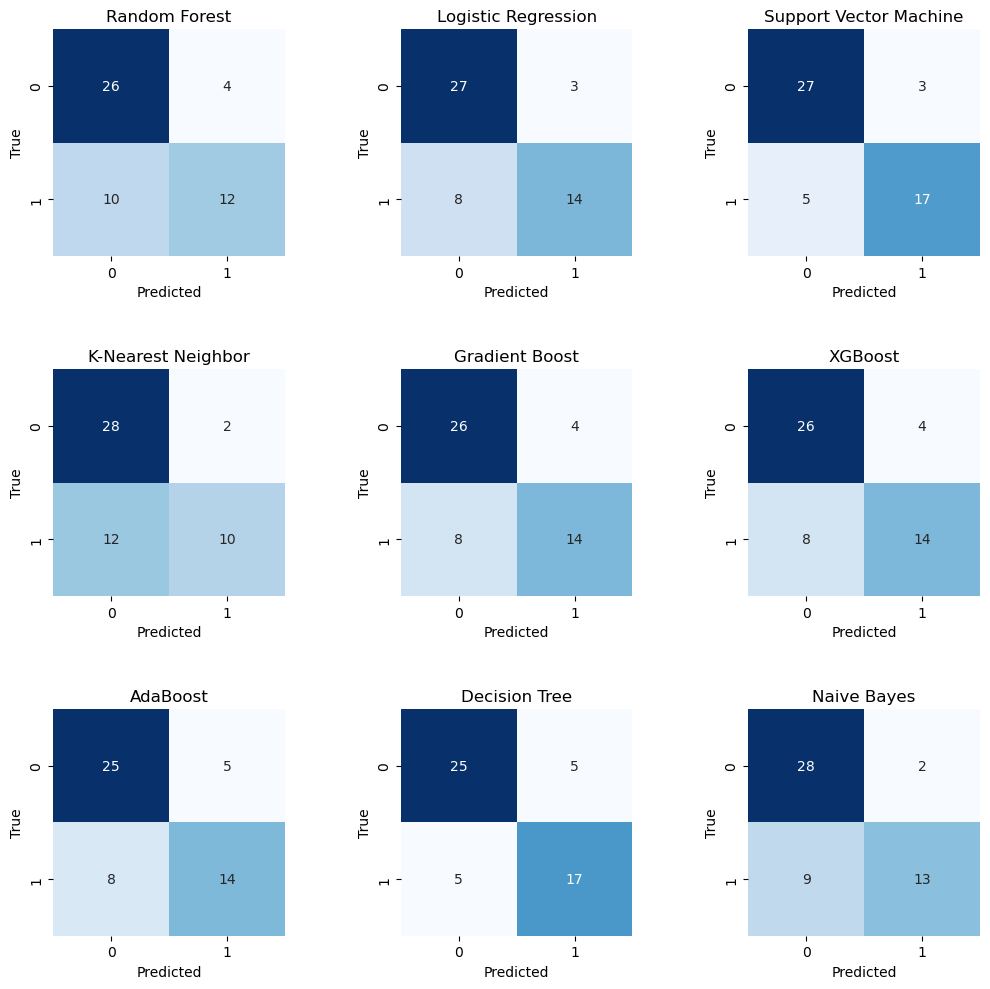

In [407]:
#Confusion Matrices 
cm_rf = confusion_matrix(y_test, y_opt_rf_pred)
cm_lr = confusion_matrix(y_test, y_opt_lr_pred)
cm_svm = confusion_matrix(y_test, y_opt_svm_pred)
cm_knn = confusion_matrix(y_test, y_opt_knn_pred)
cm_gb = confusion_matrix(y_test, y_opt_gb_pred)
cm_xg = confusion_matrix(y_test, y_opt_xg_pred)
cm_ab = confusion_matrix(y_test, y_opt_ab_pred)
cm_dt = confusion_matrix(y_test,y_opt_dt_pred)
cm_nb = confusion_matrix(y_test,y_opt_nb_pred)

#Confusion matrices plot


cms = [cm_rf, cm_lr, cm_svm, cm_knn, cm_gb, cm_xg, cm_ab, cm_dt, cm_nb]
names = ['Random Forest','Logistic Regression', 'Support Vector Machine','K-Nearest Neighbor', 'Gradient Boost', 'XGBoost', 'AdaBoost','Decision Tree','Naive Bayes']


fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax, cm, name in zip(axes.flatten(), cms, names):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(xlabel='Predicted', ylabel='True', title=name)

plt.tight_layout()


plt.subplots_adjust(wspace=0.5, hspace=0.5)


plt.rcParams['figure.figsize'] = (10, 10)

plt.show()


### Confusion Matrices demonstrate Logistic Regression, Support Vector Machine, Decision Tree, and Naive Bayes had higher amount of true predictions, including true positives and true negatives. They also have lower amounts of false negatives and positives. 

### ROC/AUC Curves

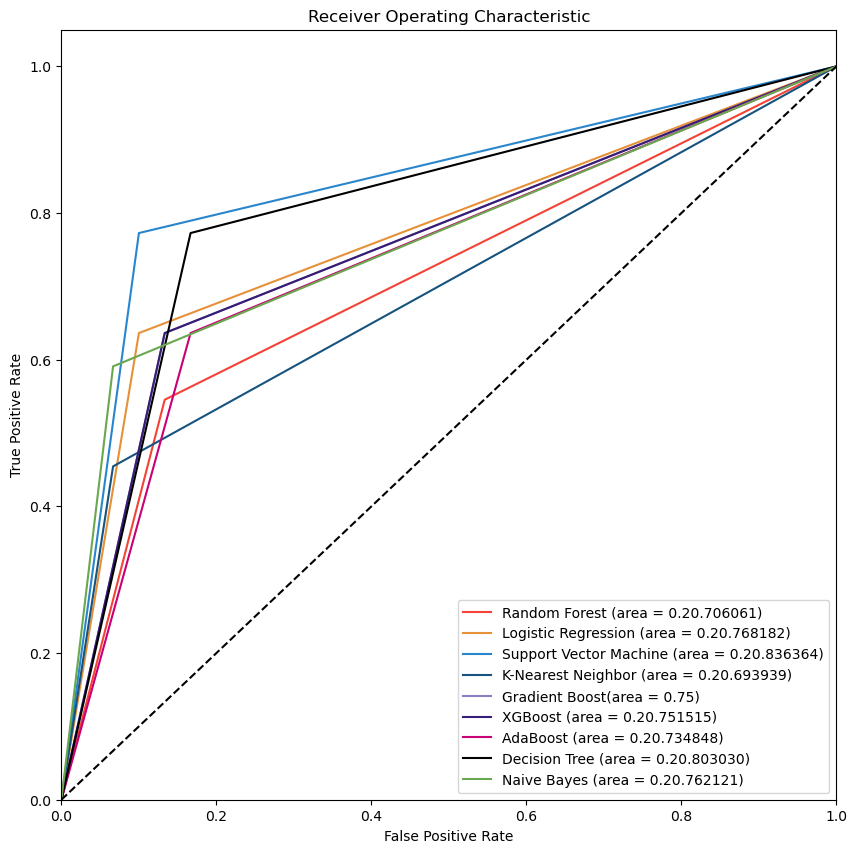

In [468]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


#ROC curve and ROC area for each model


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_opt_rf_pred)
roc_auc_rf = roc_auc_score(y_test, y_opt_rf_pred)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_opt_lr_pred)
roc_auc_lr = roc_auc_score(y_test, y_opt_lr_pred)

fpr_svm, tpr_svm, _  = roc_curve(y_test, y_opt_svm_pred)
roc_auc_svm = roc_auc_score(y_test, y_opt_svm_pred)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_opt_knn_pred)
roc_auc_knn = roc_auc_score(y_test, y_opt_knn_pred)

fpr_gb, tpr_gb, _  = roc_curve(y_test, y_opt_gb_pred)
roc_auc_gb = roc_auc_score(y_test, y_opt_gb_pred)

fpr_xg, tpr_xg, _  = roc_curve(y_test, y_opt_xg_pred)
roc_auc_xg = roc_auc_score(y_test, y_opt_xg_pred)

fpr_ab, tpr_ab, _ = roc_curve(y_test, y_opt_ab_pred)
roc_auc_ab = roc_auc_score(y_test, y_opt_ab_pred)

fpr_dt, tpr_dt, _  = roc_curve(y_test, y_opt_dt_pred)
roc_auc_dt = roc_auc_score(y_test, y_opt_dt_pred)

fpr_nb, tpr_nb, _  = roc_curve(y_test, y_opt_nb_pred)
roc_auc_nb = roc_auc_score(y_test, y_opt_nb_pred)


# Plot for ROC curves
plt.plot(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest (area = 0.2%f)' % roc_auc_rf, color = '#f44336')
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression (area = 0.2%f)' % roc_auc_lr, color = '#e69138')
plt.plot(fpr_svm, tpr_svm, label = 'Support Vector Machine (area = 0.2%f)' % roc_auc_svm, color =  '#2986cc')
plt.plot(fpr_knn, tpr_knn, label = 'K-Nearest Neighbor (area = 0.2%f)' % roc_auc_knn, color = '#16537e')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boost(area = %0.2f)' % roc_auc_gb, color = '#8e7cc3')
plt.plot(fpr_xg, tpr_xg, label = 'XGBoost (area = 0.2%f)' % roc_auc_xg, color = '#351c75')
plt.plot(fpr_ab, tpr_ab, label = 'AdaBoost (area = 0.2%f)' % roc_auc_ab, color = '#c90076')
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree (area = 0.2%f)' % roc_auc_dt, color = '#000000')
plt.plot(fpr_nb, tpr_nb, label = 'Naive Bayes (area = 0.2%f)' % roc_auc_nb, color = '#6aa84f')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



### The best performing ROC curves are  Support Vector Machine and Decision Tree. 

### Neural Network - Multilayer Perceptron 

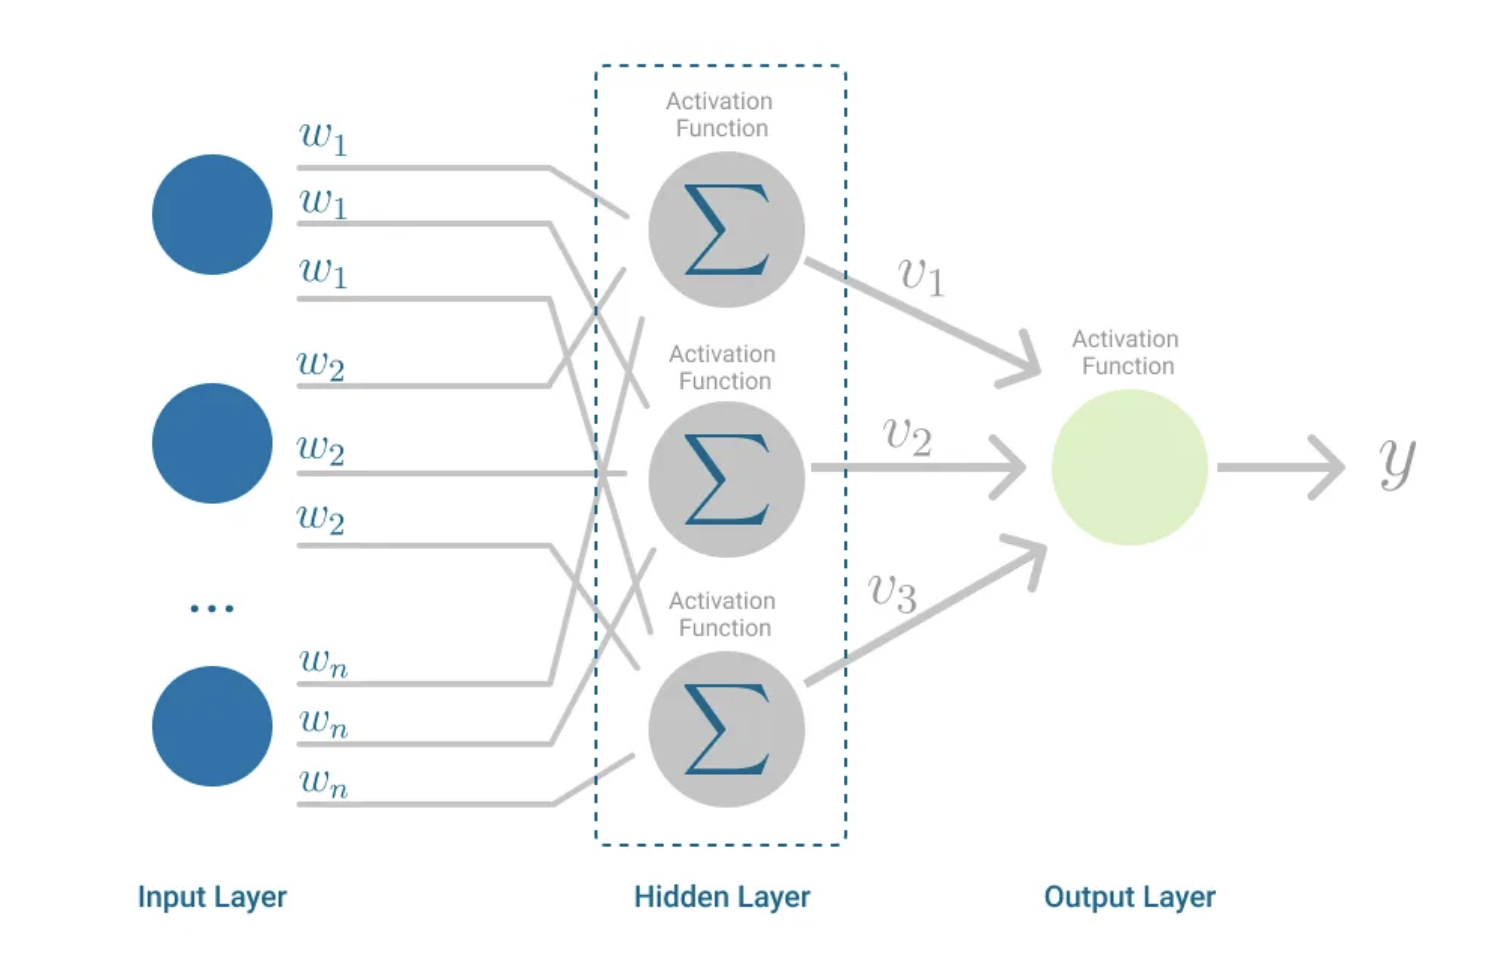

### A multilayer perceptron is neural network algorithm that contains input and output layers, and one or more hidden layers with many neurons stacked together. This data analysis will be using one input layer, one hidden layer, and one output layer. This will be constructed with Keras Tensorflow. 

In [158]:
!pip install tensorflow


In [159]:

from tensorflow import keras
from tensorflow.keras.models import Sequential #It is a linear stack of layers that allows for easy construction of neural network models layer by layer.
from tensorflow.keras.layers import Dense, Dropout #It is used for learning patterns in data through the weights associated with each connection.
from tensorflow.keras.optimizers import Adam    # its optimizer used in algorithm
from tensorflow.keras.callbacks import EarlyStopping

2024-03-16 13:18:15.287599: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [199]:
print(X_train_scaled.shape)

(206, 15)


In [200]:
print(X_train_scaled.shape[1])

15


In [309]:
#MLP 
model = Sequential()
model.add(Dense(8, input_dim=15, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

    
# Compile model
   
model.compile(optimizer= Adam(learning_rate= 0.001), loss = 'binary_crossentropy',metrics = ['accuracy'])


print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 8)                 128       
                                                                 
 dense_97 (Dense)            (None, 4)                 36        
                                                                 
 dense_98 (Dense)            (None, 1)                 5         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [310]:
history =model.fit(X_train_scaled, y_train, epochs=100, batch_size= 6, validation_data=(X_test_scaled, y_test), verbose=2)

Epoch 1/100
35/35 - 1s - loss: 0.6879 - accuracy: 0.5922 - val_loss: 0.6847 - val_accuracy: 0.5769 - 656ms/epoch - 19ms/step
Epoch 2/100
35/35 - 0s - loss: 0.6721 - accuracy: 0.5922 - val_loss: 0.6668 - val_accuracy: 0.5769 - 66ms/epoch - 2ms/step
Epoch 3/100
35/35 - 0s - loss: 0.6411 - accuracy: 0.5922 - val_loss: 0.6358 - val_accuracy: 0.5769 - 72ms/epoch - 2ms/step
Epoch 4/100
35/35 - 0s - loss: 0.5943 - accuracy: 0.5922 - val_loss: 0.5977 - val_accuracy: 0.5769 - 64ms/epoch - 2ms/step
Epoch 5/100
35/35 - 0s - loss: 0.5422 - accuracy: 0.5922 - val_loss: 0.5695 - val_accuracy: 0.5769 - 79ms/epoch - 2ms/step
Epoch 6/100
35/35 - 0s - loss: 0.5058 - accuracy: 0.5922 - val_loss: 0.5577 - val_accuracy: 0.5769 - 72ms/epoch - 2ms/step
Epoch 7/100
35/35 - 0s - loss: 0.4833 - accuracy: 0.5922 - val_loss: 0.5517 - val_accuracy: 0.6731 - 72ms/epoch - 2ms/step
Epoch 8/100
35/35 - 0s - loss: 0.4691 - accuracy: 0.8301 - val_loss: 0.5506 - val_accuracy: 0.7308 - 69ms/epoch - 2ms/step
Epoch 9/100
35

Epoch 68/100
35/35 - 0s - loss: 0.2374 - accuracy: 0.9563 - val_loss: 0.6209 - val_accuracy: 0.7885 - 68ms/epoch - 2ms/step
Epoch 69/100
35/35 - 0s - loss: 0.2360 - accuracy: 0.9612 - val_loss: 0.6256 - val_accuracy: 0.7885 - 61ms/epoch - 2ms/step
Epoch 70/100
35/35 - 0s - loss: 0.2338 - accuracy: 0.9563 - val_loss: 0.6254 - val_accuracy: 0.7885 - 58ms/epoch - 2ms/step
Epoch 71/100
35/35 - 0s - loss: 0.2318 - accuracy: 0.9612 - val_loss: 0.6290 - val_accuracy: 0.7885 - 61ms/epoch - 2ms/step
Epoch 72/100
35/35 - 0s - loss: 0.2288 - accuracy: 0.9612 - val_loss: 0.6379 - val_accuracy: 0.7885 - 56ms/epoch - 2ms/step
Epoch 73/100
35/35 - 0s - loss: 0.2269 - accuracy: 0.9563 - val_loss: 0.6505 - val_accuracy: 0.7885 - 64ms/epoch - 2ms/step
Epoch 74/100
35/35 - 0s - loss: 0.2249 - accuracy: 0.9612 - val_loss: 0.6463 - val_accuracy: 0.7885 - 57ms/epoch - 2ms/step
Epoch 75/100
35/35 - 0s - loss: 0.2236 - accuracy: 0.9612 - val_loss: 0.6530 - val_accuracy: 0.7885 - 64ms/epoch - 2ms/step
Epoch 76

In [311]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 [==============================] - 0s 4ms/step - loss: 0.7761 - accuracy: 0.7885
Test Accuracy: 78.85%


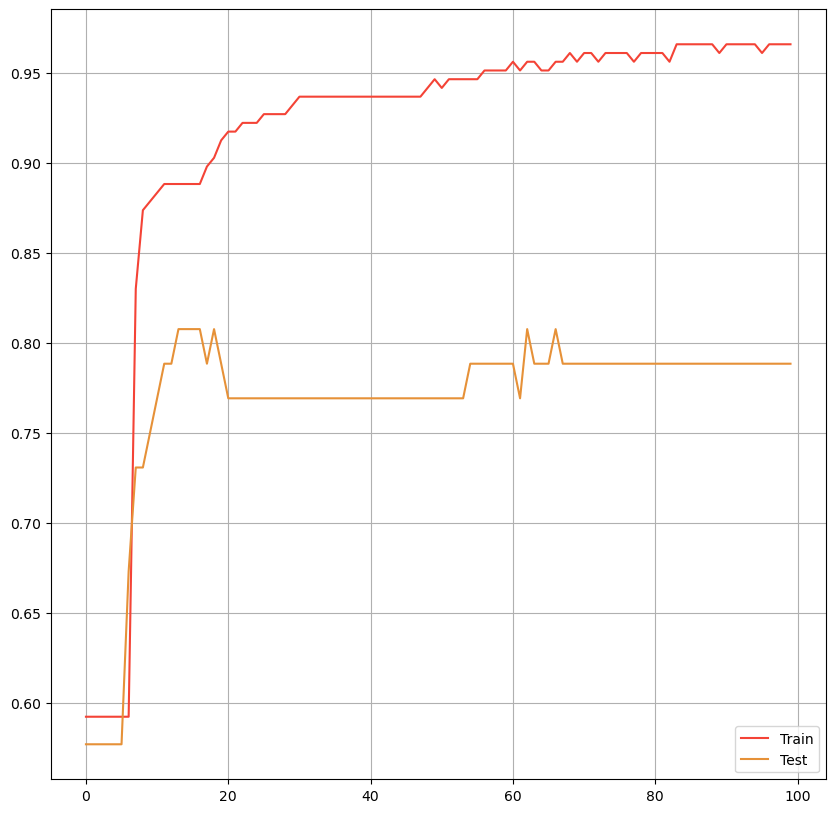

In [449]:
plt.plot(history.history['accuracy'], label = 'Train', color = '#f44336')
plt.plot(history.history['val_accuracy'], label = 'Test', color = '#e69138')
plt.grid()
plt.legend(loc = 'lower right');

### The test accuracy of the MLP Neural Network is the same as the baseline model. This mean it is on par with Logistic Regression and Naive Bayes. However, it does not perform better than Support Vector Machine or Decision Tree. 

## IV. Conclusion and Final Recommendations 

### The top 5 performing models for heart disease prediction are: 
### 1. Support Vector Machine
### 2. Decision Tree 
### 3. Naive Bayes 
### 4. Linear Regression (Baseline Model)
### 5. MLP Neural Network 

### The prediction of heart disease at an early stage can prevent grave health events and diseases. The use of an efficient and appropriate algorithm can help physicians in detecting the possible presence of heart disease before it fully manifests. It is clear that both classification models and deep learning models like neural networks can be both very useful and efficient for predicting heart disease.  However, the classification models did perform  better than the deep learning model, MLP Neural Network, in this exercise. 

### Next steps include: 
#### 1. Testing these models in specific patient settings and to select most useful parameters based on significant research
#### 2. Perform futher research on what specific evaluation metric matters more or a combination of both or many (accuracy,precision, recall, f1 score)
#### 3. Investigate how the volume and scale of a certain population with heart disease would present the need for a certain models or models